Привет! Меня зовут Цветкова Марина и это проект для компании GoProtect, занимающейся страхованием спортсменов.

#**Описание проекта:**
Компания GoProtect помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.



#**Цель проекта:**
создать модель, способную находить элементы, которые могут быть успешно исполнены спортсменом на соревнованиях

# **Информация о данных**



<b>units</b>

<li>id: идентификатор юнита</li>
<li>color: категория</li>
<li>school\_id: идентификатор школы</li>

<b>tournaments</b>

Турнир состоит из нескольких категорий, оценки по категориям расписаны в total\_scores

<li>id: идентификатор турнира</li>
<li>date\_start: дата начала</li>
<li>date\_end: дата завершения</li>
<li>origin\_id: место проведения</li>

<b>total_scores</b>

Оценки за выступления по категориям и общие за турнир

<li>id: идентификатор выступления, джойнится с tournament\_scores.total\_score\_id</li>
<li>unit\_id: идентификатор юнита, ключ к units.id</li>
<li>tournament\_id: идентификатор турнира, tournaments.id</li>
<li>components\_score: артистизм (мастерство, композиция, хореография)</li>
<li>base\_score: базовая оценка за элементы в выступлении (идеал)</li>
<li>elements\_score: реальная оценка всех выполненных элементов, base\_score+goe</li>
<li>decreasings\_score: снижения оценок за ошибки</li>
<li>total\_score: components\_score+elements\_score+decreasings\_score за выступление</li>
<li>starting\_place:
<li>place: занятое место в категории category\_name+segment\_name</li>
<li>segment\_name: название сегмента</li>
<li>info: комментарии и пояснения к оценке</li>
<li>overall\_place: итоговое место в турнире</li>
<li>overall\_total\_score: итоговая оценка за весь турнир</li>
<li>overall\_place\_str: комментарии, пояснения</li>

<b>tournament\_scores</b>

Таблица с оценками поэлементно

<li>id: идентификатор оценки за конкретный элемент/комбинацию</li>
<li>total\_score\_id: идентикатор выступления, ключ total\_scores.id</li>
<li>title: запись элемента или комбинации элементов с отметками об ошибках</li>
<li>decrease: за что снижена оценка</li>
<li>base\_score: базовая оценка (идеал, цена данного элемента/комбинации, сложность)</li>
<li>goe: Grade of Execute, качество исполнения, судейские надбавки/убавки</li>
<li>avg\_score: оценка за элемент/комбинацию (усредненная по судьям)</li>

Расшифровка элементов tournaments\_scores.title

Разбираем только одиночное катание. Есть 3 типа элементов:

- Прыжки: начинаются с цифры от 1 до 4, потом идет код прыжка, потом может стоять один из специальных кодов
- Вращения. Сначала идет код вращения, после которого стоит уровень (B – базовый, 1, 2, 3,
  - Если после элемента стоит NV – not value значит элемент не выполнен.
- Шаги. Два варианта. Может быть так же как у вращений 5 уровней и NV – StSqB, StSq1 и тд.
- Внимание:
  - Могут попадаться базовые уровни без литеры В, например ChSt или CCoSp
  - Иногда прыжки иногда указаны без цифры
  - Также могут встречаться отдельные элементы из других групп
- Ошибки:
  - q – недокрут прыжка в четверть оборота. Базовая стоимость при такой ошибке остается неизменной, но судьи обязательно снизят за это GOE
  - < – спортсмен провращался в воздухе на 90°-180 ° меньше, чем положено, "недокрутил". Стоимость прыжка за такую ошибку не сильно, но снижают.
  - << – спортсмен недокрутил более 180°. Стоимость прыжка становится, как если бы прыгнул на один оборот меньше
  - e – Этот знак ставится, когда фигурист отталкивается от льда с неправильного ребра. Правильные ребра: на лутце – наружное, на флипе – внутреннее. На базовую стоимость влияет ровно на то же количество баллов, что и <
  - ! – Этот знак так же ставится только у флипа и лутца в случае, если технический специалист посчитал, что отрыв происходит с "нечеткого ребра". На базовую стоимость прыжка эта ошибка не влияет, но судьи обязательно её учтут при выставлении GOE
  - COMBO – Не выполнен обязательный каскад в короткой программе. Этот знак после прыжка, например: 3Lz+COMBO, говорит о том, что спортсмен должен был исполнить каскад прыжков, но, по какой-то причине (чаще всего падение), не смог. На оценку не влияет, но оставляет плохое впечатление у судейской бригады.
  - REP – Обозначает ошибку, похожую на COMBO, но в произвольной программе. По правилам, в произвольной программе фигурного катания один и тот же прыжок второй раз можно исполнить только в составе каскада или комбинации. Если по каким то причинам спортсмен оба раза прыгнул прыжок сольно, то ко второй попытке добавляют этот знак и базовую стоимость уменьшают на 30%.
  - SEQ – Комбинация прыжков. Фигурист сразу после любого прыжка делает аксель. В этом случае SEQ означает, что была исполнена комбинация прыжков. Раньше базовая стоимость прыжков, исполненных в комбинации, умножалась на коэффицент 0.8, с сезона 2022 стоимость комбинации приравнивается к каскаду
- Бонус:
  - B - ознает бонус за элемент.

○ x – Элемент исполнен во второй половине программы. Отностится только к прыжкам! Если прыжок сделан во второй половине программы, его базовая стоимость умножается на коэффициент 1.1. Недавно введено ограничение – только три последних прыжка получат бонус. Ввели это ограничение, потому что многие спортсмены переносили все свои прыжки во вторую часть.
    </details>



In [1]:
#  !pip freeze > requirements.txt
#  !cat requirements.txt
#  from google.colab import files
# files.download('requirements.txt')

#Constans

In [2]:
PATH = 'data'

RANDOMSTATE = SEED = 42

VALID_FRAC = 0.2
TEST_FRAC = 0.5

#Libs

In [3]:
!pip install catboost phik

In [4]:
import os
import pickle
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier
from phik import resources, report
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import (auc, classification_report, f1_score, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Suppress warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data import

In [6]:
%cd  /content/drive/My Drive/datasets/GoProtect/

/content/drive/My Drive/datasets/GoProtect


**Описание:** Компания GoProtect помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.

**Цель проекта:** создать модель, способную находить элементы, которые могут быть успешно исполнены спортсменом на соревнованиях

In [7]:
units_file_path = 'units.csv'
tournament_scores_file_path = 'tournament_scores.csv'
total_scores_file_path = 'total_scores.csv'
tournaments_file_path = 'tournaments.csv'

In [8]:
units = pd.read_csv(units_file_path)

In [9]:
tournament_scores = pd.read_csv(tournament_scores_file_path)

In [10]:
total_scores = pd.read_csv(total_scores_file_path)

In [11]:
tournaments= pd.read_csv(tournaments_file_path)

#**Обзор данных**

##Dataset Units

In [12]:
units.head()


id  color  school_id
0  9474  green      244.0
1   733  green      203.0
2   734  green      235.0
3   735  green      168.0
4   736  green      168.0

In [13]:
units.info()
units.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4596 non-null   int64  
 1   color      4595 non-null   object 
 2   school_id  4007 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 107.8+ KB


id     school_id
count   4596.000000   4007.000000
mean    5016.516971    464.135762
std     7355.726664   5679.988355
min        1.000000      1.000000
25%     1476.750000     62.000000
50%     2953.500000    117.000000
75%     4615.250000    206.000000
max    35024.000000  99999.000000

In [14]:
unique_school_ids = units['school_id'].unique()
num_unique_schools = units['school_id'].nunique()

print("Number of unique school identifiers:", num_unique_schools)


Number of unique school identifiers: 239


In [15]:
def clean_units_dataframe(units):
    """
    Cleans the 'units' DataFrame by filling NA values in 'school_id' with -1,
    removing duplicates, and dropping rows with NAs in the 'color' column.

    Args:
    units (pd.DataFrame): The DataFrame to be cleaned.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Fill NA values in 'school_id' with -1
    units['school_id'] = units['school_id'].fillna(-1)

    # Remove duplicates and report how many were found
    initial_duplicates = units.duplicated().sum()
    if initial_duplicates > 0:
        units = units.drop_duplicates()
        print(f"Number of duplicates removed: {initial_duplicates}")

    # Drop rows where 'color' column has NA values
    initial_na_count = units['color'].isna().sum()
    units = units.dropna(subset=['color'])
    if initial_na_count > 0:
        print(f"Rows removed due to NAs in 'color': {initial_na_count}")

    # Print the info of the cleaned DataFrame
    print(units.info())

    return units

# Example usage
units = clean_units_dataframe(units)

Rows removed due to NAs in 'color': 1
<class 'pandas.core.frame.DataFrame'>
Index: 4595 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4595 non-null   int64  
 1   color      4595 non-null   object 
 2   school_id  4595 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 143.6+ KB
None


Заполнили пропуски в school_id специальным идентификатором (удалять такое большое количесво пропусков может быть не рационально, это могло бы исказить выборку), пропуски в color удалили, так как он был только один

##Dataset tournament_scores

In [16]:
tournament_scores.head(5)

id  total_score_id   title decrease  base_score   goe  avg_score
0   1               1      2A      NaN         3.3  0.66       3.96
1   2               1  3F+3Lo      NaN        10.2 -0.11      10.09
2   3               1     3Lz      NaN         0.0 -1.30       5.19
3   4               1  CCoSp4      NaN         3.5  0.56       4.06
4   5               1   FCSp4      NaN         3.2  0.64       3.84

In [17]:
uniq_decrease = (tournament_scores['decrease'].unique())
print("num_uniq_decrease:", uniq_decrease)


num_uniq_decrease: [nan 'q' '<' '!' '<<' 'nS' 'F' '*' 'e' 'nU' 'nC' '<<*' '<*' 'B' 'nS*' '!F'
 'F*' '!*' 'q*' 'e*' 'nF' 'nB' 'B.' 'f*' 'В' '<F' 'qF' 'b' '!<' 'f' '!F*'
 'FnU' 'FF']


In [18]:
 tournament_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              172158 non-null  int64  
 1   total_score_id  172158 non-null  int64  
 2   title           172158 non-null  object 
 3   decrease        41185 non-null   object 
 4   base_score      172158 non-null  float64
 5   goe             172158 non-null  float64
 6   avg_score       172158 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.2+ MB


In [19]:
zero_count = tournament_scores['base_score'].value_counts().get(0, 0)
print(f"Number of 0 in 'base_score': {zero_count}")

Number of 0 in 'base_score': 33791


base_score достаточно много 0 имеет, необходимо это учитывать в дальнейшем анализе

decrease: за что снижена оценка
Заполним новой категорией, если оценка за снижение отсутствует - предполагаем, что в этом случае информации о снижении оценки нет

In [20]:
tournament_scores.describe()

id  total_score_id     base_score            goe  \
count  172158.000000   172158.000000  172158.000000  172158.000000   
mean   148848.485444   243100.514156       2.574300       0.131771   
std    107651.944104   219065.848493       2.151716       0.797761   
min         1.000000        1.000000       0.000000      -5.750000   
25%     50613.250000     9385.000000       1.100000      -0.120000   
50%    158772.500000   442337.000000       2.600000       0.210000   
75%    223563.750000   449883.750000       3.300000       0.600000   
max    353806.000000   463639.000000      15.700000       5.060000   

           avg_score  
count  172158.000000  
mean        3.567541  
std         2.424646  
min         0.000000  
25%         1.980000  
50%         3.250000  
75%         4.200000  
max        23.360000

In [21]:
def clean_tournament_scores(tournament_scores):
    """
    Cleans the 'tournament_scores' DataFrame by filling NA values in 'decrease' column with 'No_decrease_info',
    and removing duplicates.

    Args:
    tournament_scores (pd.DataFrame): The DataFrame to be cleaned.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Fill NA values in 'decrease' with 'No_decrease_info'
    tournament_scores['decrease'] = tournament_scores['decrease'].fillna('No_decrease_info')

    # Remove duplicates and report how many were found
    initial_duplicates = tournament_scores.duplicated().sum()
    if initial_duplicates > 0:
        tournament_scores = tournament_scores.drop_duplicates()
        print(f"Number of duplicates removed: {initial_duplicates}")
    else:
        print("No duplicates found.")

    tournament_scores.info()

    return tournament_scores


tournament_scores = clean_tournament_scores(tournament_scores)

No duplicates found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              172158 non-null  int64  
 1   total_score_id  172158 non-null  int64  
 2   title           172158 non-null  object 
 3   decrease        172158 non-null  object 
 4   base_score      172158 non-null  float64
 5   goe             172158 non-null  float64
 6   avg_score       172158 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.2+ MB


##Dataset total_scores

In [22]:
total_scores.head(5)

id  unit_id  tournament_id  base_score  components_score  total_score  \
0  442027      304           4785        47.2             43.47       102.70   
1  442028      604           4785        45.4             46.71       101.19   
2  442029      409           4785        44.0             46.82        99.20   
3  442030      524           4785        46.2             44.86        91.84   
4  442031      412           4785        44.2             42.59        89.73   

   elements_score  decreasings_score  starting_place  place  \
0           59.23                0.0              17      1   
1           54.48                0.0              18      2   
2           52.38                0.0               6      3   
3           47.98               -1.0               3      4   
4           48.14               -1.0              15      5   

         segment_name                                               info  \
0  Короткая программа  x Надбавка за прыжки во второй половине програ...   
1  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
2  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
3  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
4  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   

   overall_place  overall_total_score overall_place_str  
0              2               293.74                 2  
1              1               294.75                 1  
2              4               285.57                 4  
3              3               292.42                 3  
4              6               265.34                 6

In [23]:
total_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21301 entries, 0 to 21300
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21301 non-null  int64  
 1   unit_id              21301 non-null  int64  
 2   tournament_id        21301 non-null  int64  
 3   base_score           21301 non-null  float64
 4   components_score     21301 non-null  float64
 5   total_score          21301 non-null  float64
 6   elements_score       21301 non-null  float64
 7   decreasings_score    21301 non-null  float64
 8   starting_place       21301 non-null  int64  
 9   place                21301 non-null  int64  
 10  segment_name         21284 non-null  object 
 11  info                 20720 non-null  object 
 12  overall_place        21301 non-null  int64  
 13  overall_total_score  21284 non-null  float64
 14  overall_place_str    10814 non-null  object 
dtypes: float64(6), int64(6), object(3)
m

In [24]:
total_scores.describe()

id       unit_id  tournament_id    base_score  \
count   21301.000000  21301.000000   21301.000000  21301.000000   
mean   247946.268156   2342.803859    3146.281254     27.809781   
std    218940.086177   4370.220096    3279.412969     16.337113   
min         1.000000      1.000000       1.000000      0.000000   
25%      9835.000000    418.000000      49.000000     15.560000   
50%    442628.000000   1233.000000     267.000000     24.490000   
75%    450362.000000   2217.000000    6859.000000     35.110000   
max    463639.000000  35024.000000    7117.000000     94.420000   

       components_score   total_score  elements_score  decreasings_score  \
count      21301.000000  21301.000000    21301.000000       21301.000000   
mean          31.324416     60.410021       27.836501          -0.240998   
std           17.330241     33.598123       17.745763           0.577598   
min            0.000000      0.000000        0.000000          -7.000000   
25%           20.420000     35.880000       14.880000           0.000000   
50%           26.660000     52.630000       24.270000           0.000000   
75%           41.600000     75.720000       35.910000           0.000000   
max           95.900000    201.650000      112.420000           0.000000   

       starting_place         place  overall_place  overall_total_score  
count    21301.000000  21301.000000   21301.000000         21284.000000  
mean        10.962819     10.619924      10.118117           117.443380  
std          8.352286      8.062790       8.003904            66.330049  
min          0.000000      0.000000       0.000000             0.000000  
25%          5.000000      4.000000       4.000000            69.315000  
50%          9.000000      9.000000       8.000000           119.660000  
75%         15.000000     15.000000      15.000000           168.700000  
max         54.000000     50.000000      50.000000           323.050000

In [25]:
uniq_info = (total_scores['info'].unique())
print("num_uniq_info:", uniq_info)

num_uniq_info: ['x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе'
 ... 'Нарушения в костюме:@@@(1 of 3)'
 "* Недопустимый элемент q Прыжок приземлён в четверть < Недокрученный прыжок << Пониженный прыжок F Падение в элементе nU Нет базовой позиции 'стоя'"
 "q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) nU Нет базовой позиции 'стоя'"]


In [26]:
uniq_segment_name = (total_scores['segment_name'].unique())
print("uniq_segment_name:", uniq_segment_name)

uniq_segment_name: ['Короткая программа' 'Произвольная программа' 'Произвольная программа.'
 'Элементы' 'Интерпретация' 'Интерпретация.' nan 'Кoроткая программа'
 'Произвольнaя программа' 'Пpoизвoльнaя пpoгpaммa' 'Кopoткaя пpoгpaммa'
 'Элeмeнты' 'Коpоткая программа' 'Пpoизвольная программа' 'Прыжки'
 'Kopoткaя пpoгpaммa' 'Пpoизвольнaя программа' 'Прoизвольная прoграмма']


In [27]:
uniq_overall_place_str = (total_scores['overall_place_str'].unique())
print("uniq_overall_place_str:", uniq_overall_place_str)

uniq_overall_place_str: ['2' '1' '4' '3' '6' '7' '5' '9' '13' '10' '11' '17' '12' '14' nan '15'
 '16' '8' '18' '19' '25' '24' 'NQD' '23' '21' '20' 'WD' '22' '26' '28'
 '27' '40' '29' '30' '32' '31' '35' '33' '36' '34' '39' 'FNR' '41' '38'
 '44' '45' '37' '42' '43' '46' '47' '48' '49' '50']


In [28]:
counts = total_scores['segment_name'].value_counts()

unknown_count = counts.get('Unknown', 0)

print(f"Amount 'Unknown': {unknown_count}")

Amount 'Unknown': 0


In [29]:
# Replace values in the 'segment_name' column
total_scores['segment_name'] = total_scores['segment_name'].replace(['Элементы', 'Интерпретация', 'Unknown', 'Прыжки'], 'Любительский спорт')

# Check the results of the replacement
print(total_scores['segment_name'].unique())

['Короткая программа' 'Произвольная программа' 'Произвольная программа.'
 'Любительский спорт' 'Интерпретация.' nan 'Кoроткая программа'
 'Произвольнaя программа' 'Пpoизвoльнaя пpoгpaммa' 'Кopoткaя пpoгpaммa'
 'Элeмeнты' 'Коpоткая программа' 'Пpoизвольная программа'
 'Kopoткaя пpoгpaммa' 'Пpoизвольнaя программа' 'Прoизвольная прoграмма']


К профессиональному спорту относится 'Короткая программа' 'Произвольная программа', отнесем остальные виды к любительскому

Заполняем суммой за все элементы в соревновании у юнита

Заполняем медианой пропущенные значения в колонке overall_total_score, так как их количество не очень большое


В функции clean_and_normalize_total_scores мы обработаем данные о фигурном катании, чтобы сделать анализ более точным: группируем данные по участникам и турнирам для суммирования очков, заполняем пропущенные значения в итоговых очках суммами очков, нормализуем и стандартизируем названия сегментов для унификации записей, заполняем пропущенные значения позиций участников, проверим на дубликаты и удалим если они есть.

In [30]:


def clean_total_scores(total_scores):
    """
    Cleans  the 'total_scores' DataFrame by performing several data processing operations:
    1. Summing up total scores by 'unit_id' and 'tournament_id'.
    2. Filling NaN values in 'overall_total_score' with the computed sums.
    3. Normalizing and cleaning segment names.
    4. Filling NaN values in 'overall_place_str' with 'overall_place'.
    5. Removing duplicates.
    """
    # Step 1: Group by 'unit_id' and 'tournament_id', and calculate the sum of 'total_score'
    score_sums = total_scores.groupby(['unit_id', 'tournament_id'])['total_score'].sum().reset_index()
    # Step 2: Create a dictionary for quick lookup
    score_sums_dict = score_sums.set_index(['unit_id', 'tournament_id'])['total_score'].to_dict()
    # Step 3: Define a function to fill NaN values using the dictionary
    def fill_overall_total_score(row):
        if pd.isna(row['overall_total_score']):
            return score_sums_dict.get((row['unit_id'], row['tournament_id']), row['overall_total_score'])
        return row['overall_total_score']
    # Step 4: Apply the function to fill NaN values
    total_scores['overall_total_score'] = total_scores.apply(fill_overall_total_score, axis=1)
    # Fill the 'overall_place_str' column with its overall_place value
    total_scores['overall_place_str'] = total_scores['overall_place_str'].fillna(total_scores['overall_place'].astype(str))

    # Function to clean and normalize values in the 'segment_name' column
    def clean_segment_name(name):
        if pd.isna(name):
            return "Unknown"
        name = name.strip().replace('.', '')  # Remove dots and trim whitespace from both ends of the string
        corrections = {
            'Короткая программа': ['Короткая программа', 'Кoроткая программа', 'Кopoткaя пpoгpaммa', 'Коpоткая программа', 'Kopoткaя пpoгpaммa'],
            'Произвольная программа': ['Произвольная программа', 'Произвольная программа.', 'Произвольнaя программа', 'Пpoизвoльнaя пpoгpaммa',
                                      'Пpoизвольная программа', 'Пpoизвольнaя программа', 'Прoизвольная прoграмма'],
            'Элементы': ['Элементы', 'Элeмeнты'],
            'Интерпретация': ['Интерпретация', 'Интерпретация.']
        }
        # Find and replace incorrect variants
        for correct, variants in corrections.items():
            if name in variants:
                return correct
        return name



    # Apply the cleaning function to the 'segment_name' column
    total_scores['segment_name'] = total_scores['segment_name'].apply(clean_segment_name)

    # Replace values in the 'segment_name' column
    total_scores['segment_name'] = total_scores['segment_name'].replace(['Elements', 'Interpretation', 'Unknown', 'Jumps'], 'Amateur Sports')

    total_scores['info'] = total_scores['info'].fillna('No_info')

    num_duplicates = total_scores.duplicated().sum()
    print("Number of dublicates:", num_duplicates)

    total_scores.info()

    return total_scores

cleaned_total_scores = clean_total_scores(total_scores)


Number of dublicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21301 entries, 0 to 21300
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21301 non-null  int64  
 1   unit_id              21301 non-null  int64  
 2   tournament_id        21301 non-null  int64  
 3   base_score           21301 non-null  float64
 4   components_score     21301 non-null  float64
 5   total_score          21301 non-null  float64
 6   elements_score       21301 non-null  float64
 7   decreasings_score    21301 non-null  float64
 8   starting_place       21301 non-null  int64  
 9   place                21301 non-null  int64  
 10  segment_name         21301 non-null  object 
 11  info                 21301 non-null  object 
 12  overall_place        21301 non-null  int64  
 13  overall_total_score  21301 non-null  float64
 14  overall_place_str    21301 non-null  object 
dtypes: float64(6

In [31]:
total_scores.head()

id  unit_id  tournament_id  base_score  components_score  total_score  \
0  442027      304           4785        47.2             43.47       102.70   
1  442028      604           4785        45.4             46.71       101.19   
2  442029      409           4785        44.0             46.82        99.20   
3  442030      524           4785        46.2             44.86        91.84   
4  442031      412           4785        44.2             42.59        89.73   

   elements_score  decreasings_score  starting_place  place  \
0           59.23                0.0              17      1   
1           54.48                0.0              18      2   
2           52.38                0.0               6      3   
3           47.98               -1.0               3      4   
4           48.14               -1.0              15      5   

         segment_name                                               info  \
0  Короткая программа  x Надбавка за прыжки во второй половине програ...   
1  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
2  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
3  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   
4  Короткая программа  q Прыжок приземлён в четверть x Надбавка за пр...   

   overall_place  overall_total_score overall_place_str  
0              2               293.74                 2  
1              1               294.75                 1  
2              4               285.57                 4  
3              3               292.42                 3  
4              6               265.34                 6

Заполняем значениями overall_place пропущенные значения в колонке overall_place_str, так как их количество не очень большое

## Dataset tournaments

In [32]:

tournaments.head()

id  date_start    date_end  origin_id
0   1  2090-11-29  2090-12-01        2.0
1   2  2091-03-06  2091-03-10        1.0
2   3  2090-10-05  2090-10-08        2.0
3   4  2090-10-18  2090-10-21        2.0
4   5  2090-10-21  2090-10-24        2.0

In [33]:
tournaments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          142 non-null    int64  
 1   date_start  142 non-null    object 
 2   date_end    142 non-null    object 
 3   origin_id   142 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [34]:
tournaments.describe()

id   origin_id
count   142.000000  142.000000
mean   2671.232394    1.380282
std    3129.148777    0.760108
min       1.000000    0.000000
25%      38.250000    1.000000
50%      93.500000    2.000000
75%    6692.500000    2.000000
max    7117.000000    2.000000

Кажется, что какая-то ошибка в годах(или они заменены специально). Возможно следует добавить новые колонки  - длительность соревнования, месяц и год

В этой функции мы очистим данные о турнирах, удалим дубликаты для точности анализа, конвертируем столбцы date_start и date_end в формат даты, чтобы упростить временной анализ, и добавляем новые столбцы: duration_days для отображения продолжительности турниров в днях, а также start_month и start_year

In [35]:
def clean_and_preprocess_tournaments(tournaments):
    """
    Cleans and preprocesses the 'tournaments' DataFrame by removing duplicates, converting date columns
    to datetime format, and calculating additional features such as the duration of the tournament and the
    start month and year.

    Args:
    tournaments (pd.DataFrame): The DataFrame containing data on tournaments.

    Returns:
    pd.DataFrame: The DataFrame with the dates converted and new columns added.
    """
    # Remove duplicates and report how many were found
    num_duplicates = tournaments.duplicated().sum()
    if num_duplicates > 0:
        tournaments = tournaments.drop_duplicates()
        print(f"Number of duplicates removed: {num_duplicates}")
    else:
        print("No duplicates found.")

    # Convert 'date_start' and 'date_end' columns to datetime format
    tournaments['date_start'] = pd.to_datetime(tournaments['date_start'])
    tournaments['date_end'] = pd.to_datetime(tournaments['date_end'])

    # Display the data types to confirm the conversion
    print(tournaments.dtypes)

    # Calculate the duration of the tournament in days
    tournaments['duration_days'] = (tournaments['date_end'] - tournaments['date_start']).dt.days

    # Extract the month and year from the start date
    tournaments['start_month'] = tournaments['date_start'].dt.month
    tournaments['start_year'] = tournaments['date_start'].dt.year

    tournaments.info()

    return tournaments


tournaments = clean_and_preprocess_tournaments(tournaments)


No duplicates found.
id                     int64
date_start    datetime64[ns]
date_end      datetime64[ns]
origin_id            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             142 non-null    int64         
 1   date_start     142 non-null    datetime64[ns]
 2   date_end       142 non-null    datetime64[ns]
 3   origin_id      142 non-null    float64       
 4   duration_days  142 non-null    int64         
 5   start_month    142 non-null    int32         
 6   start_year     142 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2)
memory usage: 6.8 KB


#Обьединение таблиц

In [36]:
# # merging tables
# df1 = pd.merge(total_scores, units, left_on='unit_id', right_on='id', suffixes=('_score', '_unit'))
# df1= df1.drop('id_unit', axis=1)
# df2 = pd.merge(df1, tournaments, left_on='tournament_id', right_on='id', suffixes=('', '_tournament'))
# df2= df2.drop('id', axis=1)
# df = pd.merge(df2, tournament_scores, left_on='id_score', right_on='total_score_id')
# df.rename(columns={
#     'base_score_x': 'base_score_id_score',
#     'base_score_y': 'base_score_element'
# }, inplace=True)


In [37]:
def merge_dataframes(total_scores, units, tournaments, tournament_scores):
    """
    Merges multiple dataframes into a single dataframe for comprehensive analysis.

    Args:
    total_scores (pd.DataFrame): DataFrame containing scores and related information.
    units (pd.DataFrame): DataFrame containing unit information.
    tournaments (pd.DataFrame): DataFrame containing tournament details.
    tournament_scores (pd.DataFrame): DataFrame containing detailed tournament scores.

    Returns:
    pd.DataFrame: A merged DataFrame containing all the information from the input DataFrames.

    The function merges 'total_scores' with 'units' on 'unit_id', then merges the resulting DataFrame with 'tournaments' on 'tournament_id', and finally merges with 'tournament_scores' on 'id_score'. Irrelevant columns are dropped after each merge to keep the DataFrame clean.
    """
    # Merge total_scores with units
    df1 = pd.merge(total_scores, units, left_on='unit_id', right_on='id', suffixes=('_score', '_unit'))
    df1 = df1.drop('id_unit', axis=1)

    # Merge the result with tournaments
    df2 = pd.merge(df1, tournaments, left_on='tournament_id', right_on='id', suffixes=('', '_tournament'))
    df2 = df2.drop('id', axis=1)

    # Merge the result with tournament_scores
    df = pd.merge(df2, tournament_scores, left_on='id_score', right_on='total_score_id')

    # Rename columns to prevent ambiguity
    df.rename(columns={
        'base_score_x': 'base_score_id_score',
        'base_score_y': 'base_score_element'
    }, inplace=True)

    return df


df = merge_dataframes(total_scores, units, tournaments, tournament_scores)
display(df.head())

id_score  unit_id  tournament_id  base_score_id_score  components_score  \
0    442027      304           4785                 47.2             43.47   
1    442027      304           4785                 47.2             43.47   
2    442027      304           4785                 47.2             43.47   
3    442027      304           4785                 47.2             43.47   
4    442027      304           4785                 47.2             43.47   

   total_score  elements_score  decreasings_score  starting_place  place  ...  \
0        102.7           59.23                0.0              17      1  ...   
1        102.7           59.23                0.0              17      1  ...   
2        102.7           59.23                0.0              17      1  ...   
3        102.7           59.23                0.0              17      1  ...   
4        102.7           59.23                0.0              17      1  ...   

  duration_days start_month  start_year      id total_score_id  title  \
0             4          12        2091  156223         442027    4Lz   
1             4          12        2091  156224         442027  4S+3T   
2             4          12        2091  156225         442027  FCSp4   
3             4          12        2091  156226         442027     3A   
4             4          12        2091  156227         442027  StSq3   

           decrease base_score_element   goe  avg_score  
0  No_decrease_info               11.5  3.78      15.28  
1  No_decrease_info               13.9  2.49      16.39  
2  No_decrease_info                3.2  0.87       4.07  
3  No_decrease_info                0.0  2.40      11.20  
4  No_decrease_info                3.3  0.85       4.15  

[5 rows x 30 columns]

In [38]:
print(df.columns)

Index(['id_score', 'unit_id', 'tournament_id', 'base_score_id_score',
       'components_score', 'total_score', 'elements_score',
       'decreasings_score', 'starting_place', 'place', 'segment_name', 'info',
       'overall_place', 'overall_total_score', 'overall_place_str', 'color',
       'school_id', 'date_start', 'date_end', 'origin_id', 'duration_days',
       'start_month', 'start_year', 'id', 'total_score_id', 'title',
       'decrease', 'base_score_element', 'goe', 'avg_score'],
      dtype='object')


In [39]:
df.head()

id_score  unit_id  tournament_id  base_score_id_score  components_score  \
0    442027      304           4785                 47.2             43.47   
1    442027      304           4785                 47.2             43.47   
2    442027      304           4785                 47.2             43.47   
3    442027      304           4785                 47.2             43.47   
4    442027      304           4785                 47.2             43.47   

   total_score  elements_score  decreasings_score  starting_place  place  ...  \
0        102.7           59.23                0.0              17      1  ...   
1        102.7           59.23                0.0              17      1  ...   
2        102.7           59.23                0.0              17      1  ...   
3        102.7           59.23                0.0              17      1  ...   
4        102.7           59.23                0.0              17      1  ...   

  duration_days start_month  start_year      id total_score_id  title  \
0             4          12        2091  156223         442027    4Lz   
1             4          12        2091  156224         442027  4S+3T   
2             4          12        2091  156225         442027  FCSp4   
3             4          12        2091  156226         442027     3A   
4             4          12        2091  156227         442027  StSq3   

           decrease base_score_element   goe  avg_score  
0  No_decrease_info               11.5  3.78      15.28  
1  No_decrease_info               13.9  2.49      16.39  
2  No_decrease_info                3.2  0.87       4.07  
3  No_decrease_info                0.0  2.40      11.20  
4  No_decrease_info                3.3  0.85       4.15  

[5 rows x 30 columns]

In [40]:
# Sort the DataFrame by 'unit_id', 'tournament_id', 'year_start', and 'date_start'
df.sort_values(by=['unit_id', 'tournament_id', 'start_year', 'date_start', 'segment_name'], inplace=True)

# Identify all columns with 'score' and 'base_score_element' and 'goe'
score_columns = [col for col in df.columns if 'score' in col] + ['base_score_element', 'goe']

# Function to normalize scores by year
def normalize_by_year(df, columns):
    for col in columns:
        yearly_means = df.groupby('start_year')[col].transform('mean')
        df[col] = df[col] / yearly_means
    return df

# Apply normalization
df = normalize_by_year(df, score_columns)


Outliers (Boolean DataFrame):
        id_score  unit_id  tournament_id  base_score_id_score  \
32019      False    False          False                False   
32020      False    False          False                False   
32021      False    False          False                False   
32022      False    False          False                False   
32023      False    False          False                False   
...          ...      ...            ...                  ...   
116170     False     True          False                False   
116171     False     True          False                False   
116172     False     True          False                False   
116173     False     True          False                False   
116174     False     True          False                False   

        components_score  total_score  elements_score  decreasings_score  \
32019              False        False           False              False   
32020              False        False

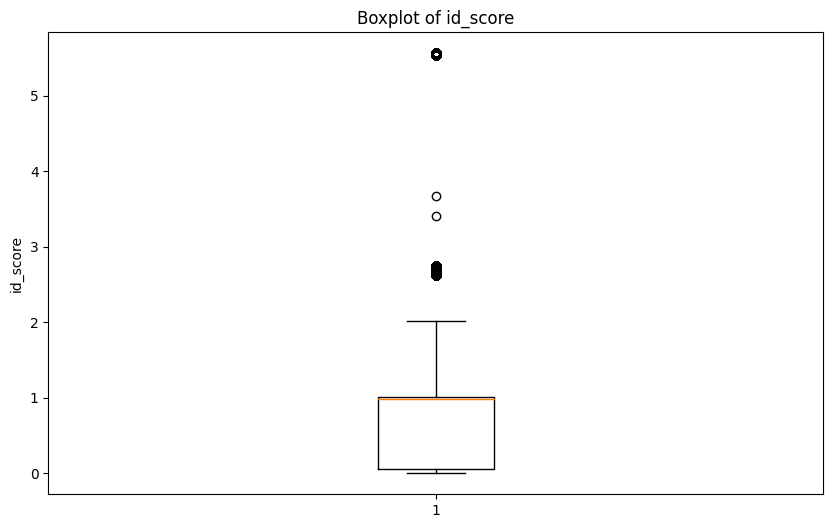

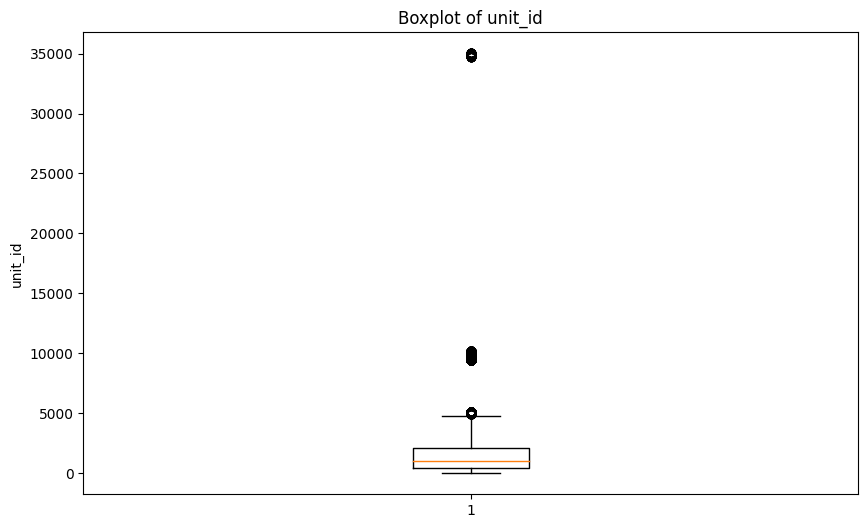

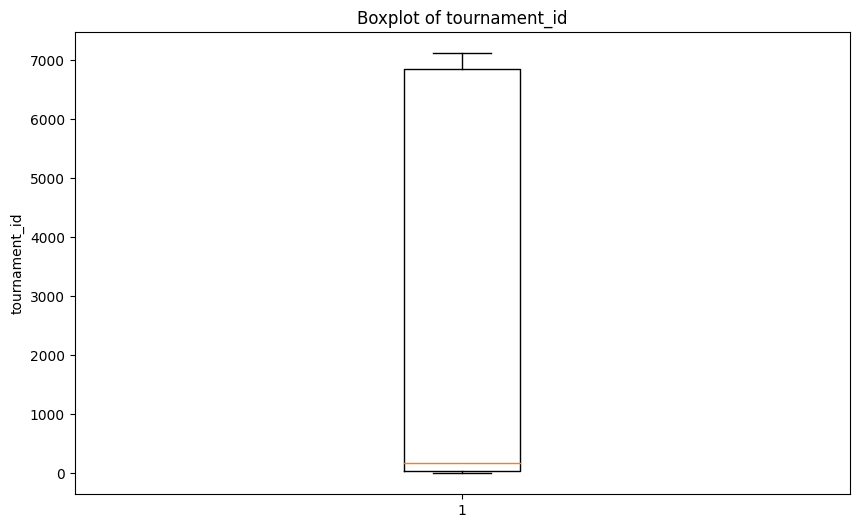

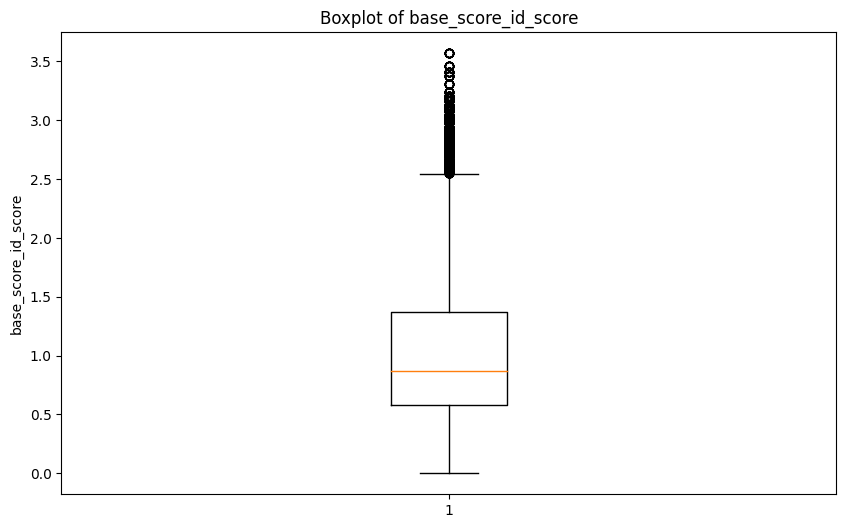

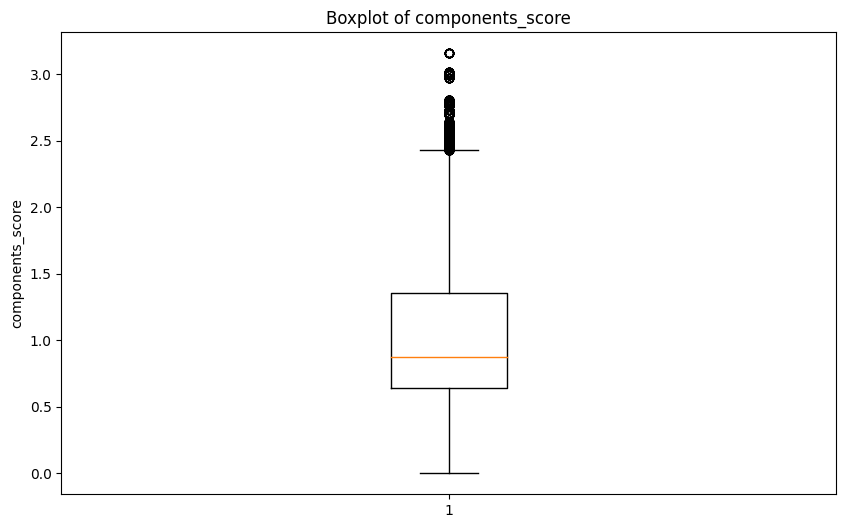

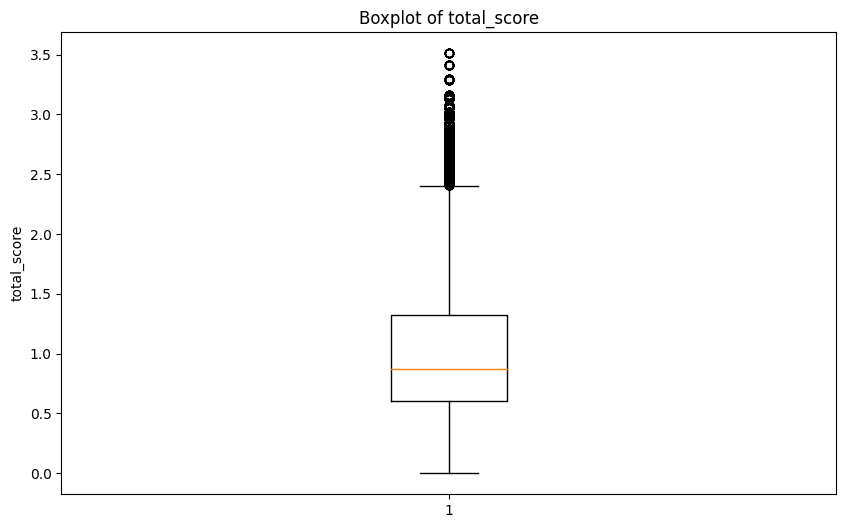

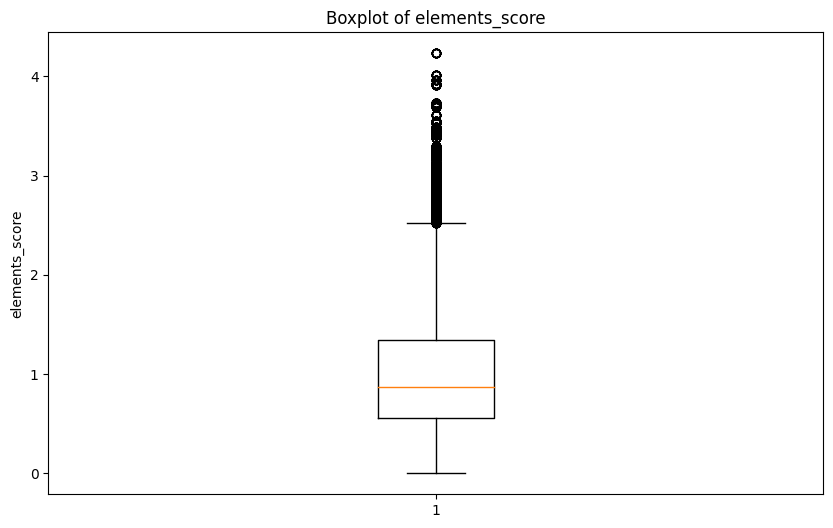

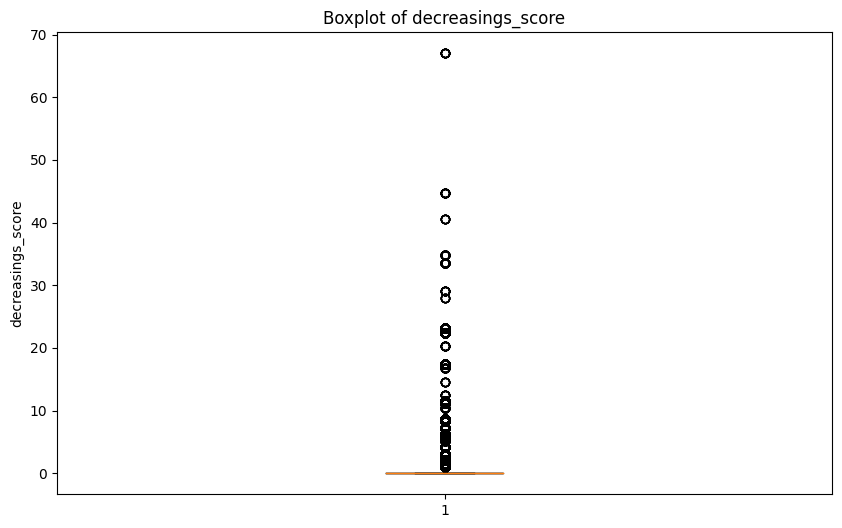

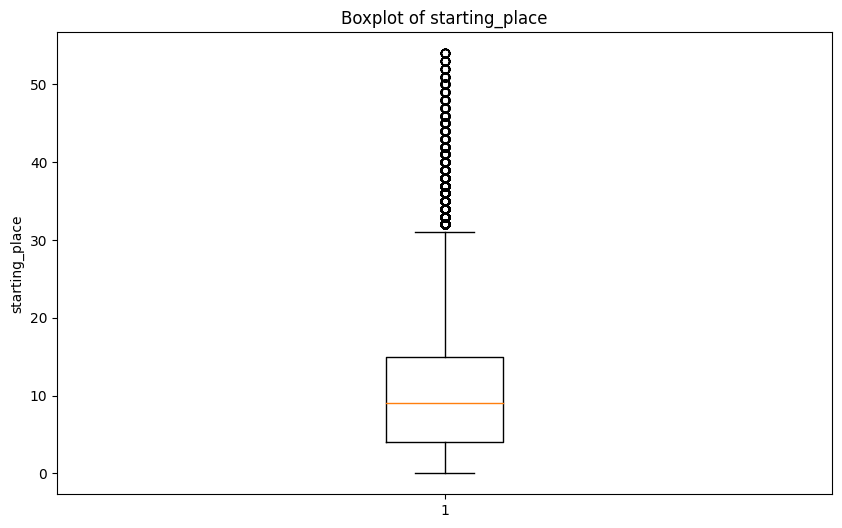

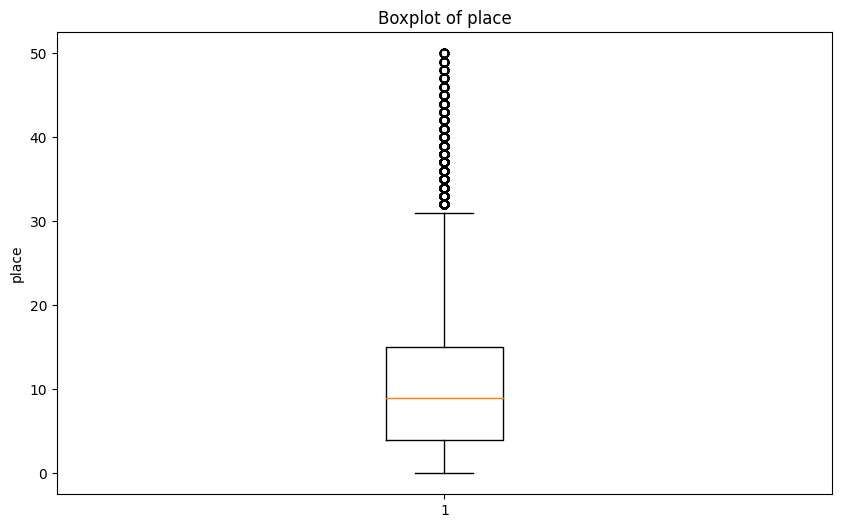

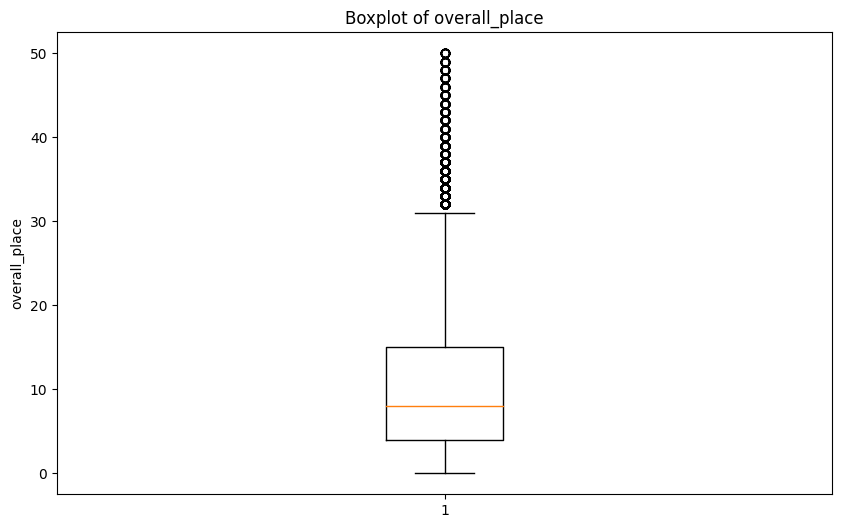

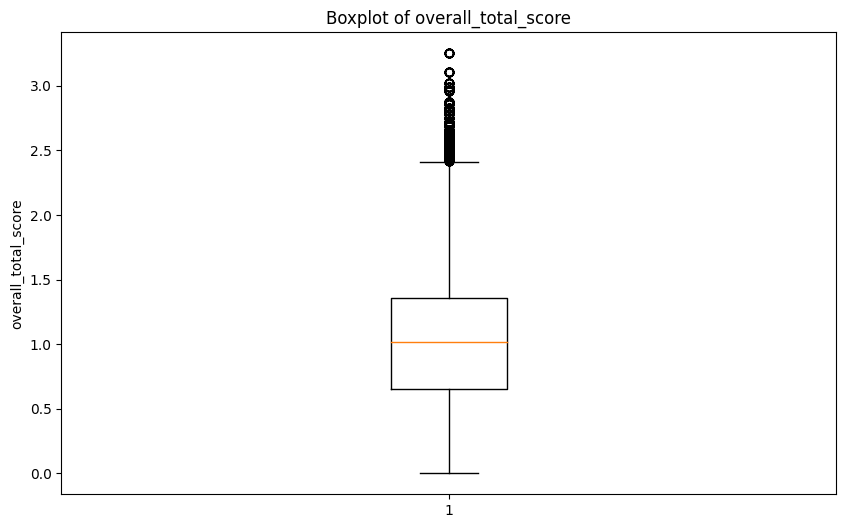

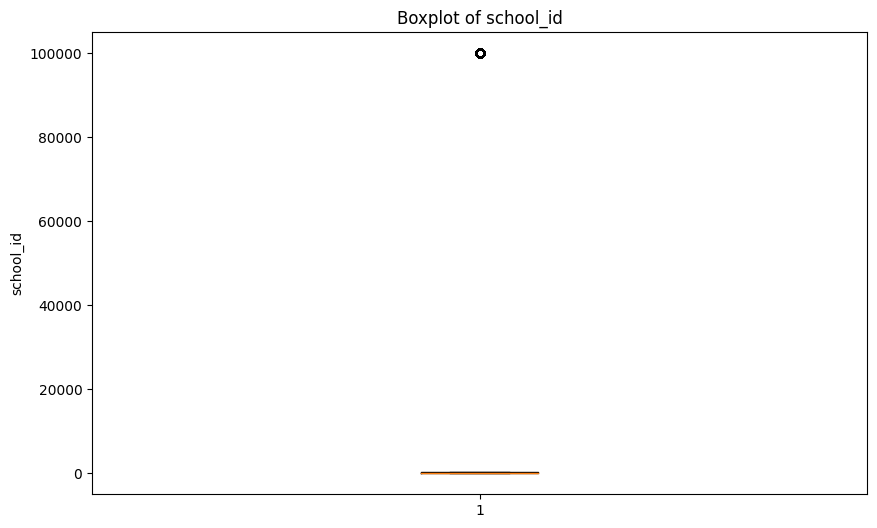

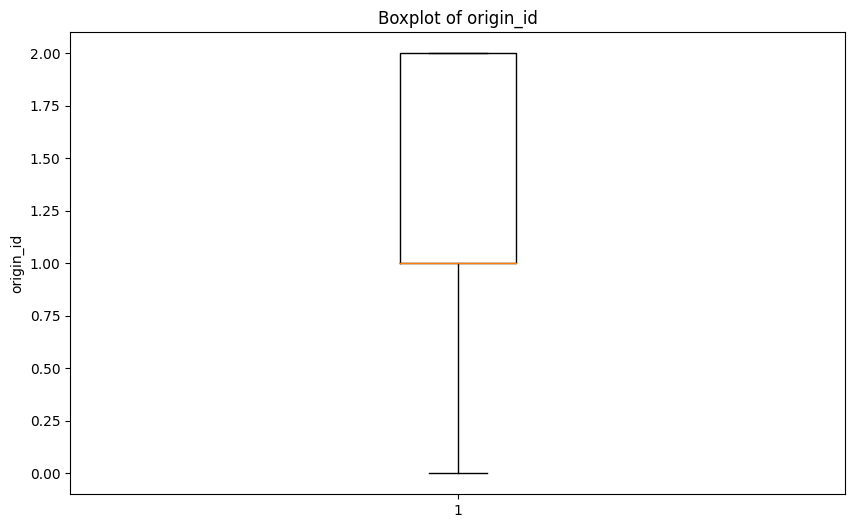

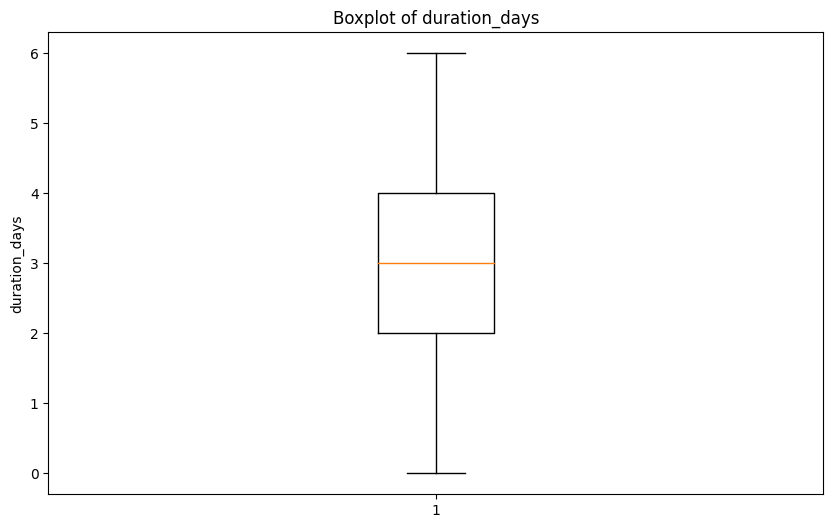

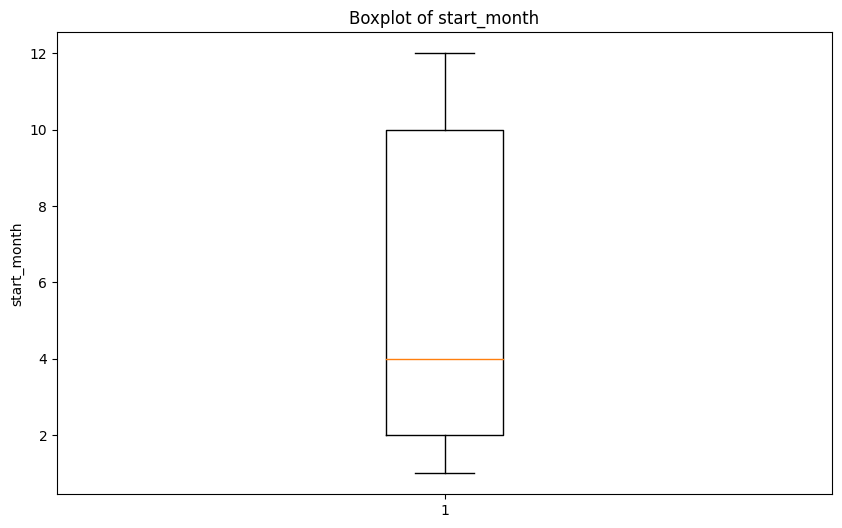

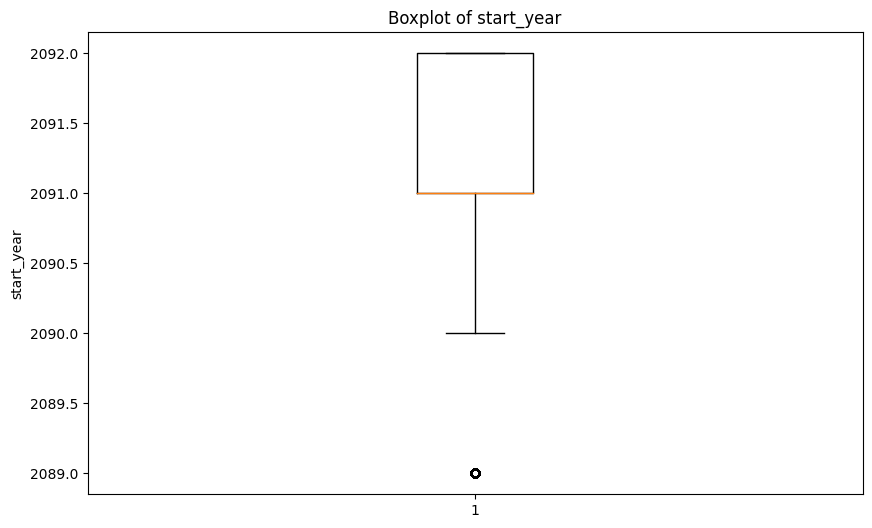

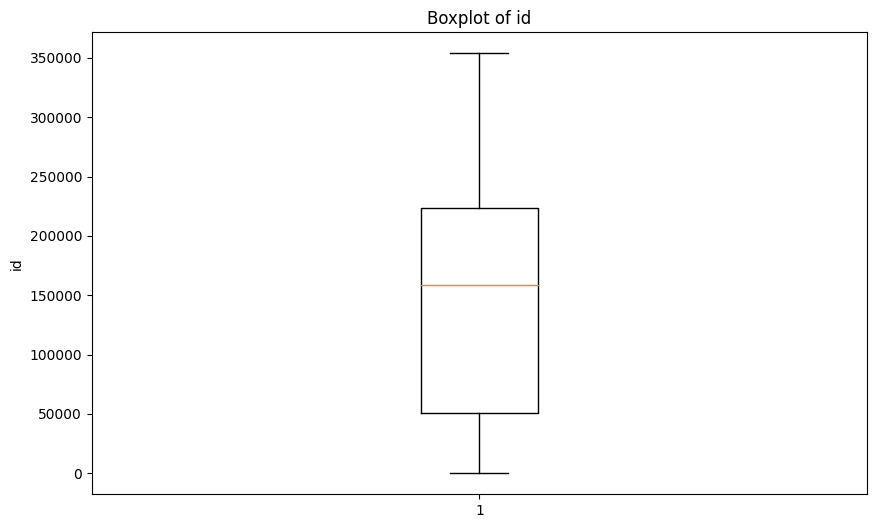

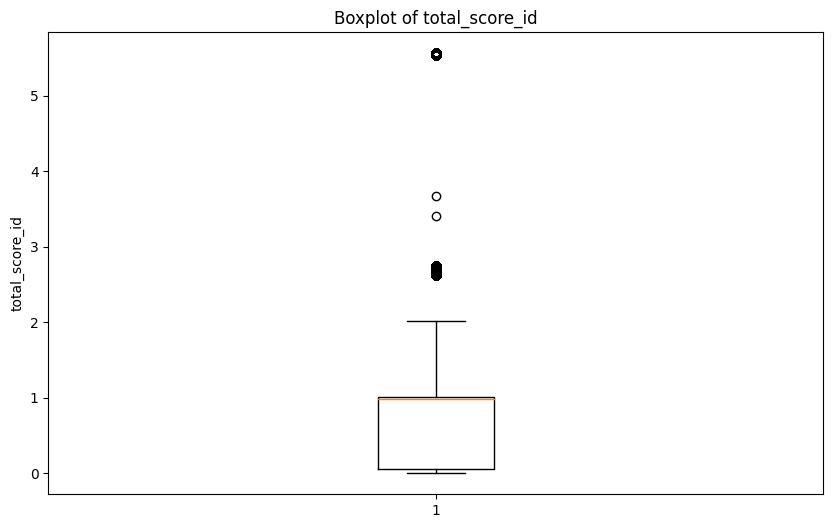

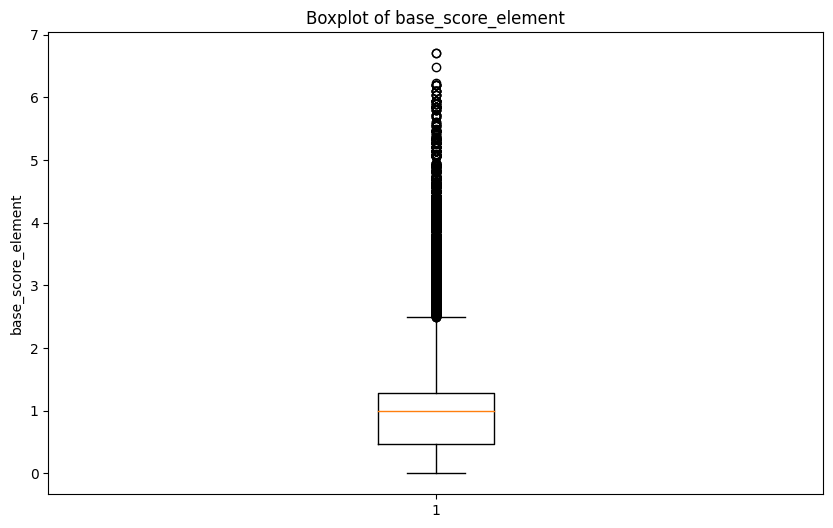

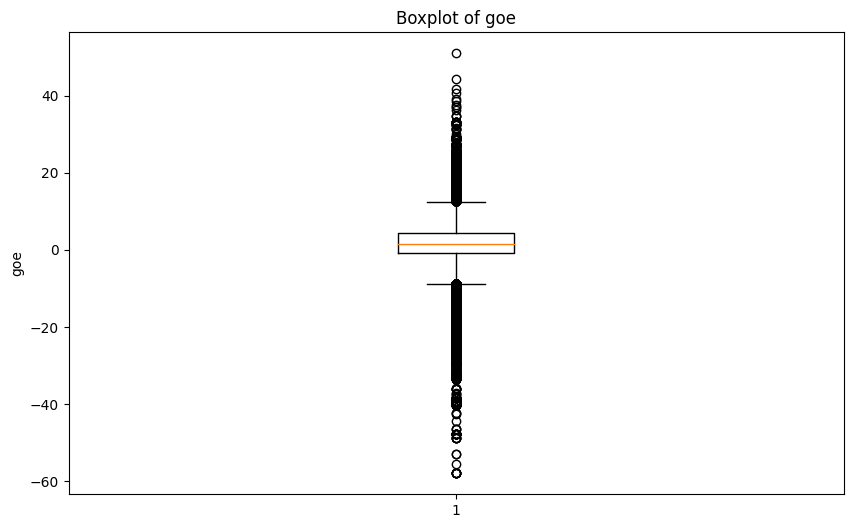

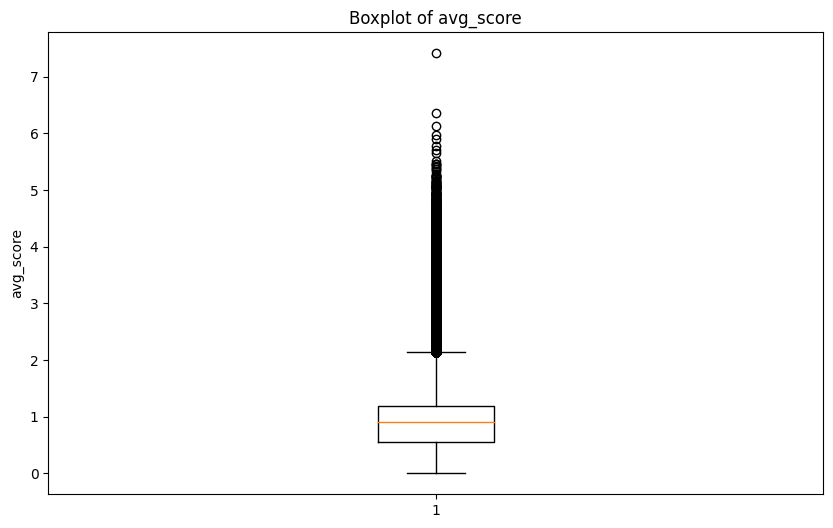

In [41]:
def detect_outliers_iqr(df):
    """
    Detect outliers in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data to analyze.

    Returns:
    outliers (pd.DataFrame): Boolean DataFrame indicating the presence of outliers.
    outliers_rows (pd.DataFrame): DataFrame containing rows with outliers.
    outliers_count (pd.Series): Series containing the count of outliers for each numeric column.
    """

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

    # Display rows that contain outliers
    outliers_rows = df[outliers.any(axis=1)]

    # Count outliers for each column
    outliers_count = outliers.sum()

    return outliers, outliers_rows, outliers_count

def plot_outliers(df):
    """
    Plot box plots for each numerical column in the DataFrame to visualize outliers.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data to analyze.
    """

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Plot each column in a separate graph
    for column in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        plt.boxplot(df_numeric[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()

# Example usage:
# Assuming df is your DataFrame
outliers, outliers_rows, outliers_count = detect_outliers_iqr(df)

# Print outliers
print("Outliers (Boolean DataFrame):")
print(outliers)

print("Rows with Outliers:")
print(outliers_rows)

print("Count of Outliers per Column:")
print(outliers_count)

# Plot outliers
plot_outliers(df)




In [42]:
# Calculate the percentage of outliers for each column
outliers_percentage = (outliers_count / len(df)) * 100

# Print the percentage of outliers
print("Percentage of Outliers per Column:")
print(outliers_percentage)


Percentage of Outliers per Column:
id_score               19.042972
unit_id                 8.532278
tournament_id           0.000000
base_score_id_score     0.695292
components_score        0.669734
total_score             1.167532
elements_score          1.814612
decreasings_score      21.605734
starting_place          2.285691
place                   1.923814
overall_place           1.669397
overall_total_score     0.652308
school_id               0.313665
origin_id               0.000000
duration_days           0.000000
start_month             0.000000
start_year              1.412656
id                      0.000000
total_score_id         19.042972
base_score_element      5.665145
goe                     7.086514
avg_score               6.704307
dtype: float64


Высокие проценты выбросов:

decreasings_score (21.61%) указывает на то, что этот показатель часто регистрирует значения, сильно отличающиеся от нормы, что может быть связано с природой штрафов или уменьшений, которые могут быть очень переменными.

goe (Grade of Execution) и avg_score (около 5-7%) свидетельствуют о значительных вариациях, возможно, отражающих субъективные элементы в оценках или различия в качестве выполнения.

base_score_element (5.65%) может указывать на различия в сложности элементов, которые пытаются выполнить участники.

Удалим некоторые выбросы, процент, которых не очень большой < 3 процентов.

base_score_id_score     0.695292
components_score        0.669734
total_score             1.167532
elements_score          1.814612
starting_place          2.285691
place                   1.923814
overall_place           1.669397
overall_total_score     0.652308


In [43]:
# Get the boolean DataFrame for outliers and the count of outliers per column
outliers, outliers_rows, outliers_count = detect_outliers_iqr(df)

# Reset the index in df to ensure alignment with the Boolean indexing
df.reset_index(drop=True, inplace=True)
outliers.reset_index(drop=True, inplace=True)

# List of columns with outlier percentage less than 3%
columns_to_clean = ['base_score_id_score', 'components_score', 'total_score',
                    'elements_score', 'starting_place', 'place',
                    'overall_place', 'overall_total_score']

# Filtering columns to clean based on outlier percentage threshold
total_rows = len(df)
columns_to_clean = [col for col in columns_to_clean if (outliers_count[col] / total_rows * 100) < 3]

# Removing outliers only in the specified columns, reindexing as necessary
for col in columns_to_clean:
    df = df.loc[~outliers[col]]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161080 entries, 0 to 172157
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_score             161080 non-null  float64       
 1   unit_id              161080 non-null  int64         
 2   tournament_id        161080 non-null  int64         
 3   base_score_id_score  161080 non-null  float64       
 4   components_score     161080 non-null  float64       
 5   total_score          161080 non-null  float64       
 6   elements_score       161080 non-null  float64       
 7   decreasings_score    161080 non-null  float64       
 8   starting_place       161080 non-null  int64         
 9   place                161080 non-null  int64         
 10  segment_name         161080 non-null  object        
 11  info                 161080 non-null  object        
 12  overall_place        161080 non-null  int64         
 13  overall_total_score

In [45]:
known_elements = [
    # Jumps
    # 'T', 'S', 'Lo', 'Eu', 'F', 'Lz', 'A',
    '1T', '1S', '1Lo', '1Eu', '1F', '1Lz', '1A',
    '2T', '2S', '2Lo', '2F', '2Lz', '2A',
    '3T', '3S', '3Lo', '3F', '3Lz', '3A',
    '4T', '4S', '4Lo', '4F', '4Lz', '4A',
    # Spins and sequences
    'USp', 'LSp', 'CSp', 'SSp', 'FUSp', 'FLSp', 'FCSp', 'FSSp',
    'CUSp', 'CLSp', 'CCSp', 'CSSp', 'FCUSp', 'FCLSp', 'FCCSp', 'FCSSp',
    'CoSp', 'CCoSp', 'FCoSp', 'FCCoSp', 'StSq', 'ChSq', 'SpSq'
]

major_errors = ['<<', 'e', 'NV']
moderate_errors = ['<', 'q', '!']
minor_errors = ['COMBO', 'SЕQ','SEQ', 'REP', '_', 'V']

# Compile separate error patterns for each type
major_error_pattern = re.compile('|'.join(map(re.escape, major_errors)))
moderate_error_pattern = re.compile('|'.join(map(re.escape, moderate_errors)))
minor_error_pattern = re.compile('|'.join(map(re.escape, minor_errors)))

# Create a single regex pattern for all known elements
known_elements_pattern = re.compile('|'.join(f'^{re.escape(elem)}(\d)?' for elem in known_elements))
def parse_elements(row):
    title = row['title'].replace("*", "_")  # Normalize all stars to underscore
    goe = row['goe']
    elements = title.split('+')
    element_results = []
    successful = 1  # Assume success unless an error is found

    for element in elements:
        original_element = element  # Keep original for debugging
        processed = False

        while element:
            # Check for known elements
            match = known_elements_pattern.match(element)
            if match:
                # Add recognized element with any numbers
                full_element = match.group(0)
                element_results.append(full_element)
                element = element[len(full_element):]  # Remove matched part from the string
                processed = True
                continue

            # Check and handle major and moderate errors
            major_match = major_error_pattern.match(element)
            if major_match:
                successful = 0
                element = element[len(major_match.group(0)):]  # Remove major error
                continue

            moderate_match = moderate_error_pattern.match(element)
            if moderate_match:
                successful = 0
                element = element[len(moderate_match.group(0)):]  # Remove moderate error
                continue

            # Handle minor errors differently based on goe
            minor_match = minor_error_pattern.match(element)
            if minor_match:
                if goe >= 0:
                    element = element[len(minor_match.group(0)):]  # Remove minor error if goe >= 0
                    continue
                else:
                    successful = 0
                    element = element[len(minor_match.group(0)):]  # Keep processing if goe < 0
                    continue
            major_match = major_error_pattern.search(element)
            if major_match:
                successful = 0
                element = element[major_match.start():major_match.end()]
                continue
            moderate_match = moderate_error_pattern.search(element)
            if moderate_match:
                successful = 0
                element = element[:moderate_match.start()] + element[moderate_match.end():]
                # element = element[moderate_match.start():moderate_match.end()]
                continue
            minor_match = minor_error_pattern.search(element)
            if minor_match:
                element = element[:minor_match.start()] + element[minor_match.end():]
                continue
            element_results.append(element)
            break  # Exit while loop after adding what remains

    return element_results, successful

In [46]:
for r in df['title'].unique():
  sample_row_combination_q = {
    'title': r,
    'goe': 0.5
  }
  val, suc = parse_elements(sample_row_combination_q)
  mixed_data_string = ''
  for v in val :
    mixed_data_string += v + " "
  print("source = "+r+" val = "+ mixed_data_string + " ; suc = "+str(suc)+" \n")

Streaming output truncated to the last 5000 lines.
source = 2F+1Lo+2Lo<* val = 2F 1Lo 2Lo  ; suc = 0 

source = 2Lz+2T<+2Lo val = 2Lz 2T 2Lo  ; suc = 0 

source = 2A+REP val = 2A  ; suc = 1 

source = 3T+2A+2A+SЕQ val = 3T 2A 2A  ; suc = 1 

source = 3F*+2T* val = 3F 2T  ; suc = 1 

source = 3F* val = 3F  ; suc = 1 

source = 3T+2A<+2Aq+SЕQ val = 3T 2A 2A  ; suc = 0 

source = 3F<<+2Lo val = 3F 2Lo  ; suc = 0 

source = 2F+2Loq+1A+SЕQ val = 2F 2Lo 1A  ; suc = 0 

source = 3F<+COMBO val = 3F  ; suc = 0 

source = 3F<<+2Lo< val = 3F 2Lo  ; suc = 0 

source = 2Fq+2T val = 2F 2T  ; suc = 0 

source = 2Lzq+2Lo<+2T val = 2Lz 2Lo 2T  ; suc = 0 

source = 2F!q+2Lo<+2T< val = 2F 2Lo 2T  ; suc = 0 

source = 2F!q+2Lo< val = 2F 2Lo  ; suc = 0 

source = 2Lzq+2T val = 2Lz 2T  ; suc = 0 

source = LSp val = LSp  ; suc = 1 

source = 2F!+2T<* val = 2F 2T  ; suc = 0 

source = 2Lz<+1Eu+2F< val = 2Lz 1Eu 2F  ; suc = 0 

source = 2Lz+1Eu+2F< val = 2Lz 1Eu 2F  ; suc = 0 

source = 2Lz+1Eu+2F!q val = 2Lz

In [47]:
# Apply the parse_elements function to the DataFrame
df['elements'], df['successful'] = zip(*df.apply(parse_elements, axis=1))

# Convert elements to binary columns
unique_elements = set([el for sublist in df['elements'] for el in sublist])
for element in unique_elements:
    df[f'clean_{element}'] = df['elements'].apply(lambda x: 1 if element in x else 0)

# Check the resulting DataFrame
display(df.head())

id_score  unit_id  tournament_id  base_score_id_score  components_score  \
0  0.000012        1              1             0.983769          0.638166   
1  0.000012        1              1             0.983769          0.638166   
2  0.000012        1              1             0.983769          0.638166   
3  0.000012        1              1             0.983769          0.638166   
4  0.000012        1              1             0.983769          0.638166   

   total_score  elements_score  decreasings_score  starting_place  place  ...  \
0     0.790124        1.051505               -0.0               2      5  ...   
1     0.790124        1.051505               -0.0               2      5  ...   
2     0.790124        1.051505               -0.0               2      5  ...   
3     0.790124        1.051505               -0.0               2      5  ...   
4     0.790124        1.051505               -0.0               2      5  ...   

  clean_A clean_4S  clean_FCSp2  clean_FCSSp clean_1W clean_FCoSp2  clean_2T  \
0       0        0            0            0        0            0         0   
1       0        0            0            0        0            0         0   
2       0        0            0            0        0            0         0   
3       0        0            0            0        0            0         0   
4       0        0            0            0        0            0         0   

  clean_LSp1 clean_StSq3  clean_1A  
0          0           0         0  
1          0           0         0  
2          0           0         0  
3          0           0         0  
4          0           0         0  

[5 rows x 136 columns]

In [48]:

# Вывод всех колонок
all_columns = list(df.columns)
print(all_columns)

['id_score', 'unit_id', 'tournament_id', 'base_score_id_score', 'components_score', 'total_score', 'elements_score', 'decreasings_score', 'starting_place', 'place', 'segment_name', 'info', 'overall_place', 'overall_total_score', 'overall_place_str', 'color', 'school_id', 'date_start', 'date_end', 'origin_id', 'duration_days', 'start_month', 'start_year', 'id', 'total_score_id', 'title', 'decrease', 'base_score_element', 'goe', 'avg_score', 'elements', 'successful', 'clean_FUSp1', 'clean_2S', 'clean_CSp', 'clean_CSSp2', 'clean_3Lo', 'clean_SSp3', 'clean_StSq2', 'clean_USp', 'clean_3T', 'clean_1S', 'clean_CCSp4', 'clean_FCCoSp2', 'clean_3A', 'clean_FLSp3', 'clean_FSSp', 'clean_SSp', 'clean_CCoSp2', 'clean_StSq4', 'clean_FCoSp', 'clean_StSq', 'clean_3F', 'clean_ChSpl1', 'clean_CoSp', 'clean_4Lz', 'clean_CCSp1', 'clean_2Lo', 'clean_CCoSp3', 'clean_ChSq', 'clean_1Lo', 'clean_CCSp', 'clean_StSq1', 'clean_FCCoSp3', 'clean_F', 'clean_CCoSp1', 'clean_4T', 'clean_1F', 'clean_SSp1', 'clean_Lz', '

In [49]:

pd.set_option('display.max_columns', None)
display(df.head(1))

id_score  unit_id  tournament_id  base_score_id_score  components_score  \
0  0.000012        1              1             0.983769          0.638166   

   total_score  elements_score  decreasings_score  starting_place  place  \
0     0.790124        1.051505               -0.0               2      5   

         segment_name                                               info  \
0  Короткая программа  x Надбавка за прыжки во второй половине програ...   

   overall_place  overall_total_score overall_place_str  color  school_id  \
0              4             1.268389                 4  green      198.0   

  date_start   date_end  origin_id  duration_days  start_month  start_year  \
0 2090-11-29 2090-12-01        2.0              2           11        2090   

   id  total_score_id title          decrease  base_score_element      goe  \
0   1        0.000012    2A  No_decrease_info            1.268855  4.54384   

   avg_score elements  successful  clean_FUSp1  clean_2S  clean_CSp  \
0   1.077751     [2A]           1            0         0          0   

   clean_CSSp2  clean_3Lo  clean_SSp3  clean_StSq2  clean_USp  clean_3T  \
0            0          0           0            0          0         0   

   clean_1S  clean_CCSp4  clean_FCCoSp2  clean_3A  clean_FLSp3  clean_FSSp  \
0         0            0              0         0            0           0   

   clean_SSp  clean_CCoSp2  clean_StSq4  clean_FCoSp  clean_StSq  clean_3F  \
0          0             0            0            0           0         0   

   clean_ChSpl1  clean_CoSp  clean_4Lz  clean_CCSp1  clean_2Lo  clean_CCoSp3  \
0             0           0          0            0          0             0   

   clean_ChSq  clean_1Lo  clean_CCSp  clean_StSq1  clean_FCCoSp3  clean_F  \
0           0          0           0            0              0        0   

   clean_CCoSp1  clean_4T  clean_1F  clean_SSp1  clean_Lz  clean_FSSp3  \
0             0         0         0           0         0            0   

   clean_FSSp1  clean_FCSp1  clean_FCCoSp1  clean_T  clean_S  clean_CCSp3  \
0            0            0              0        0        0            0   

   clean_LSp3  clean_4F  clean_FCCoSp4  clean_CCoSp4  clean_1Eu  clean_CSp4  \
0           0         0              0             0          0           0   

   clean_FLSp4  clean_FCSSp3  clean_CCSp2  clean_SSp4  clean_FLSp2  \
0            0             0            0           0            0   

   clean_LSp2  clean_3Lz  clean_FCSp3  clean_4Lo  clean_SSp2  clean_FSsp2  \
0           0          0            0          0           0            0   

   clean_2Lz  clean_Sp  clean_FCSSp4  clean_CSSp1  clean_CSSp3  clean_Lo  \
0          0         0             0            0            0         0   

   clean_CoSp2  clean_FCCoSp  clean_FCCSp4  clean_1Lz  clean_CCoSp  \
0            0             0             0          0            0   

   clean_FCSSp1  clean_CSp1  clean_FSSp2  clean_LSp4  clean_CSp3  \
0             0           0            0           0           0   

   clean_FCSSp2  clean_CoSp1  clean_ChSq1  clean_LSp  clean_1T  clean_CSSp  \
0             0            0            0          0         0           0   

   clean_3S  clean_FCSp  clean_CSSp4  clean_B  clean_FSSp4  clean_FCSp4  \
0         0           0            0        0            0            0   

   clean_CSp2  clean_ChSpl  clean_2A  clean_2F  clean_A  clean_4S  \
0           0            0         1         0        0         0   

   clean_FCSp2  clean_FCSSp  clean_1W  clean_FCoSp2  clean_2T  clean_LSp1  \
0            0            0         0             0         0           0   

   clean_StSq3  clean_1A  
0            0         0

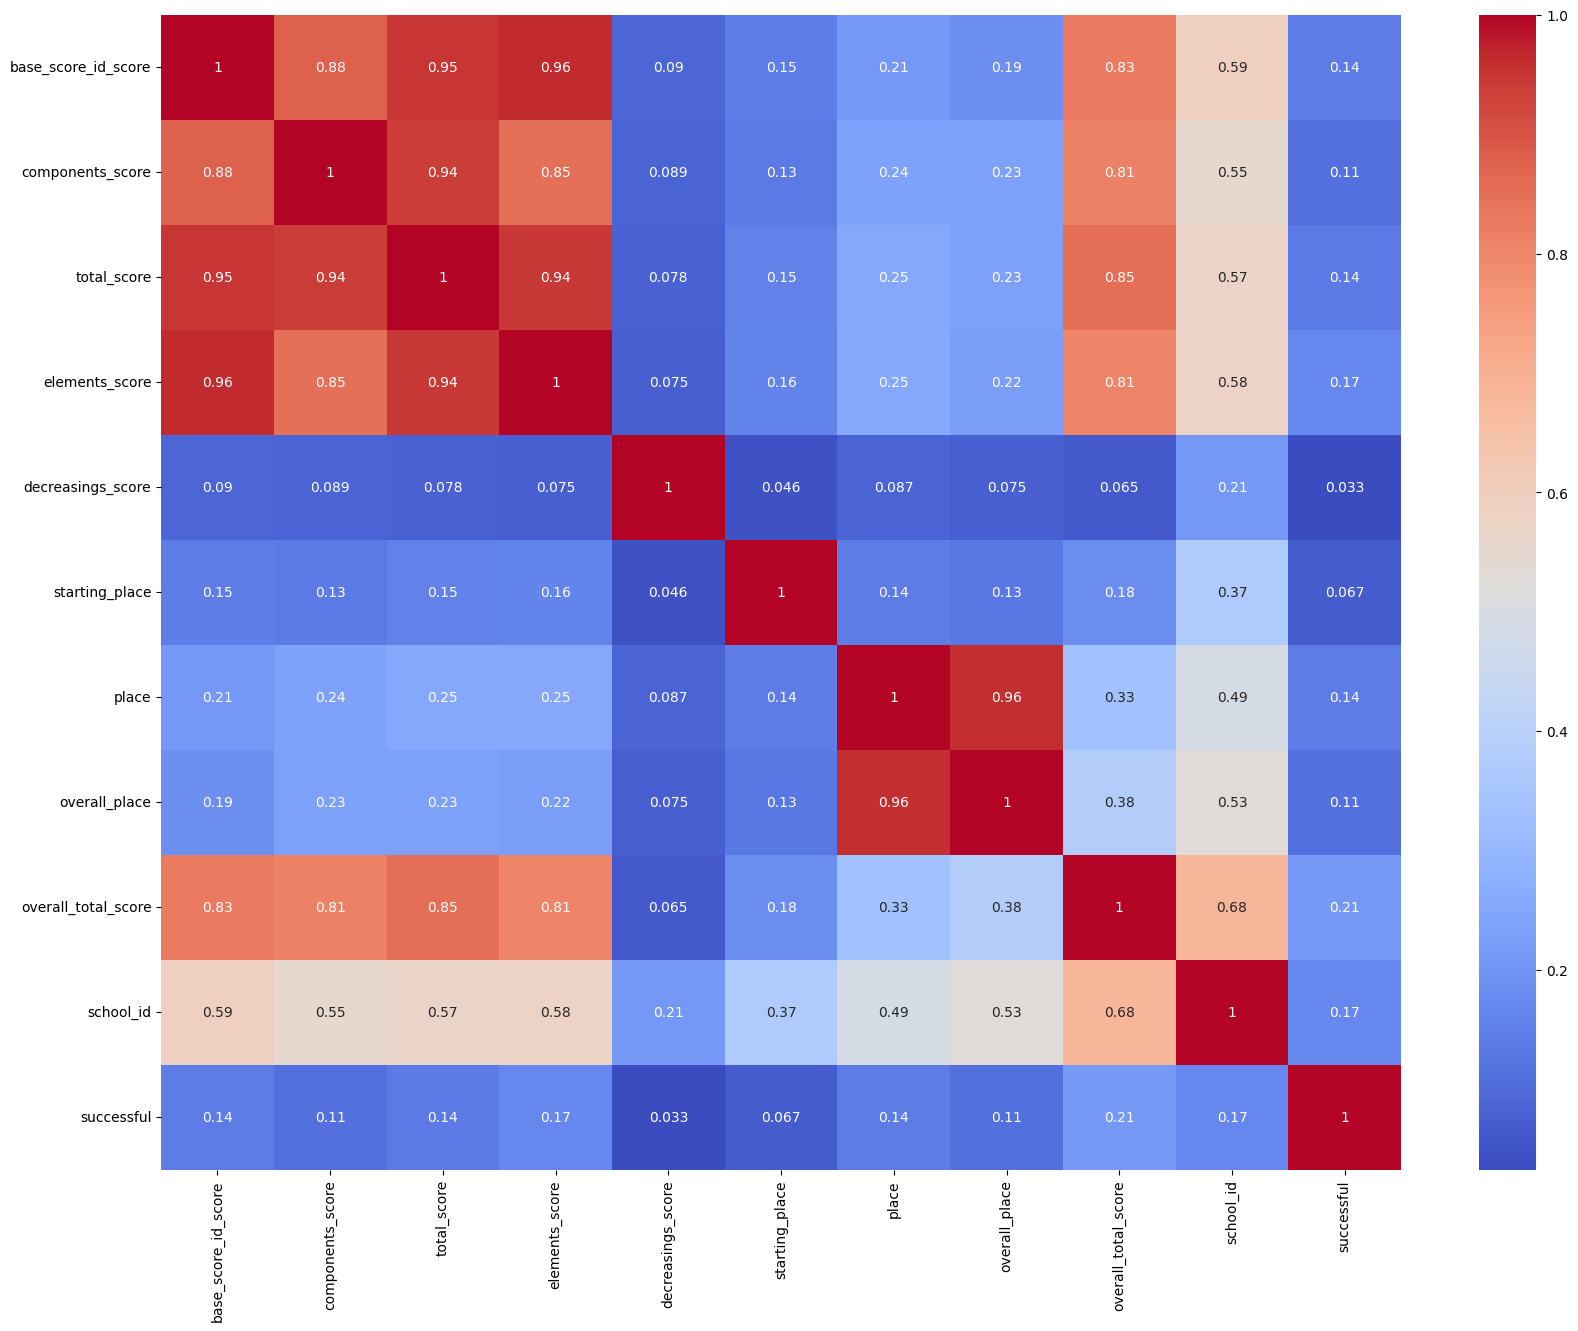

In [50]:

# Select only relevant columns for correlation analysis
correlation_columns = [
    'base_score_id_score', 'components_score', 'total_score', 'elements_score',
    'decreasings_score', 'starting_place', 'place', 'overall_place',
    'overall_total_score', 'school_id', 'successful'
]

df_corr = df[correlation_columns]

# Set the interval columns for numerical data
interval_cols = [
    'base_score_id_score', 'components_score', 'total_score', 'elements_score',
    'decreasings_score', 'starting_place', 'place', 'overall_place',
    'overall_total_score'
]

# Calculate the phik correlation matrix
phik_matrix = df_corr.phik_matrix(interval_cols=interval_cols)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.show()


Разные виды оценок друг с другом коррелируют, что логично. Необходимо будет учитывать это в дальнейшем построении модели


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161080 entries, 0 to 172157
Columns: 136 entries, id_score to clean_1A
dtypes: datetime64[ns](2), float64(13), int32(2), int64(112), object(7)
memory usage: 167.1+ MB


Нормализуем данные относильно каждого года соревнований, так как оценки и шкалы могут разниться каждый год

In [52]:
# # Normalize 'base_score' within each year
df['normalized_base_score'] = df.groupby('start_year')['base_score_element'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Rank by normalized 'base_score' within each 'unit_id'
df['base_score_rank'] = df.groupby('unit_id')['normalized_base_score'].rank(method='first')


In [53]:
df.columns

Index(['id_score', 'unit_id', 'tournament_id', 'base_score_id_score',
       'components_score', 'total_score', 'elements_score',
       'decreasings_score', 'starting_place', 'place',
       ...
       'clean_FCSp2', 'clean_FCSSp', 'clean_1W', 'clean_FCoSp2', 'clean_2T',
       'clean_LSp1', 'clean_StSq3', 'clean_1A', 'normalized_base_score',
       'base_score_rank'],
      dtype='object', length=138)

In [54]:
# Check the resulting DataFrame
print(df[['unit_id', 'base_score_element', 'normalized_base_score', 'base_score_rank']].head(10))

   unit_id  base_score_element  normalized_base_score  base_score_rank
0        1            1.268855               0.210191            144.0
1        1            3.921914               0.649682            243.0
2        1            0.000000               0.000000              1.0
3        1            1.345755               0.222930            173.0
4        1            1.230404               0.203822            136.0
5        1            1.038154               0.171975             82.0
6        1            0.999704               0.165605             65.0
7        1            1.268855               0.210191            145.0
8        1            0.000000               0.000000              2.0
9        1            3.921914               0.649682            244.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161080 entries, 0 to 172157
Columns: 138 entries, id_score to base_score_rank
dtypes: datetime64[ns](2), float64(15), int32(2), int64(112), object(7)
memory usage: 169.6+ MB


In [56]:
df.head(1)

id_score  unit_id  tournament_id  base_score_id_score  components_score  \
0  0.000012        1              1             0.983769          0.638166   

   total_score  elements_score  decreasings_score  starting_place  place  \
0     0.790124        1.051505               -0.0               2      5   

         segment_name                                               info  \
0  Короткая программа  x Надбавка за прыжки во второй половине програ...   

   overall_place  overall_total_score overall_place_str  color  school_id  \
0              4             1.268389                 4  green      198.0   

  date_start   date_end  origin_id  duration_days  start_month  start_year  \
0 2090-11-29 2090-12-01        2.0              2           11        2090   

   id  total_score_id title          decrease  base_score_element      goe  \
0   1        0.000012    2A  No_decrease_info            1.268855  4.54384   

   avg_score elements  successful  clean_FUSp1  clean_2S  clean_CSp  \
0   1.077751     [2A]           1            0         0          0   

   clean_CSSp2  clean_3Lo  clean_SSp3  clean_StSq2  clean_USp  clean_3T  \
0            0          0           0            0          0         0   

   clean_1S  clean_CCSp4  clean_FCCoSp2  clean_3A  clean_FLSp3  clean_FSSp  \
0         0            0              0         0            0           0   

   clean_SSp  clean_CCoSp2  clean_StSq4  clean_FCoSp  clean_StSq  clean_3F  \
0          0             0            0            0           0         0   

   clean_ChSpl1  clean_CoSp  clean_4Lz  clean_CCSp1  clean_2Lo  clean_CCoSp3  \
0             0           0          0            0          0             0   

   clean_ChSq  clean_1Lo  clean_CCSp  clean_StSq1  clean_FCCoSp3  clean_F  \
0           0          0           0            0              0        0   

   clean_CCoSp1  clean_4T  clean_1F  clean_SSp1  clean_Lz  clean_FSSp3  \
0             0         0         0           0         0            0   

   clean_FSSp1  clean_FCSp1  clean_FCCoSp1  clean_T  clean_S  clean_CCSp3  \
0            0            0              0        0        0            0   

   clean_LSp3  clean_4F  clean_FCCoSp4  clean_CCoSp4  clean_1Eu  clean_CSp4  \
0           0         0              0             0          0           0   

   clean_FLSp4  clean_FCSSp3  clean_CCSp2  clean_SSp4  clean_FLSp2  \
0            0             0            0           0            0   

   clean_LSp2  clean_3Lz  clean_FCSp3  clean_4Lo  clean_SSp2  clean_FSsp2  \
0           0          0            0          0           0            0   

   clean_2Lz  clean_Sp  clean_FCSSp4  clean_CSSp1  clean_CSSp3  clean_Lo  \
0          0         0             0            0            0         0   

   clean_CoSp2  clean_FCCoSp  clean_FCCSp4  clean_1Lz  clean_CCoSp  \
0            0             0             0          0            0   

   clean_FCSSp1  clean_CSp1  clean_FSSp2  clean_LSp4  clean_CSp3  \
0             0           0            0           0           0   

   clean_FCSSp2  clean_CoSp1  clean_ChSq1  clean_LSp  clean_1T  clean_CSSp  \
0             0            0            0          0         0           0   

   clean_3S  clean_FCSp  clean_CSSp4  clean_B  clean_FSSp4  clean_FCSp4  \
0         0           0            0        0            0            0   

   clean_CSp2  clean_ChSpl  clean_2A  clean_2F  clean_A  clean_4S  \
0           0            0         1         0        0         0   

   clean_FCSp2  clean_FCSSp  clean_1W  clean_FCoSp2  clean_2T  clean_LSp1  \
0            0            0         0             0         0           0   

   clean_StSq3  clean_1A  normalized_base_score  base_score_rank  
0            0         0               0.210191            144.0

In [57]:
# Step 1: Identify `clean_` Columns
clean_columns = [col for col in df.columns if col.startswith('clean_')]

# Step 2: Calculate the Count of 1s in Each `clean_` Column
clean_counts = df[clean_columns].apply(lambda col: (col == 1).sum())

# Step 3: Filter `clean_` Columns with Count of 1s Less than 1000
columns_to_keep = clean_counts[clean_counts >= 1000].index.tolist()

# Step 4: Combine the Filtered `clean_` Columns with the Rest of the DataFrame
columns_to_keep += [col for col in df.columns if not col.startswith('clean_')]

# Step 5: Create the Filtered DataFrame
df = df[columns_to_keep]

# Step 6: Display the Result
print(f"Columns kept: {columns_to_keep}")
display(df.info())

Columns kept: ['clean_2S', 'clean_3Lo', 'clean_StSq2', 'clean_3T', 'clean_3A', 'clean_CCoSp2', 'clean_StSq', 'clean_3F', 'clean_ChSpl1', 'clean_2Lo', 'clean_CCoSp3', 'clean_1Lo', 'clean_StSq1', 'clean_CCoSp1', 'clean_FSSp3', 'clean_LSp3', 'clean_FCCoSp4', 'clean_CCoSp4', 'clean_1Eu', 'clean_3Lz', 'clean_FCSp3', 'clean_2Lz', 'clean_1Lz', 'clean_FSSp2', 'clean_LSp4', 'clean_ChSq1', 'clean_3S', 'clean_CSSp4', 'clean_B', 'clean_FSSp4', 'clean_FCSp4', 'clean_2A', 'clean_2F', 'clean_2T', 'clean_StSq3', 'clean_1A', 'id_score', 'unit_id', 'tournament_id', 'base_score_id_score', 'components_score', 'total_score', 'elements_score', 'decreasings_score', 'starting_place', 'place', 'segment_name', 'info', 'overall_place', 'overall_total_score', 'overall_place_str', 'color', 'school_id', 'date_start', 'date_end', 'origin_id', 'duration_days', 'start_month', 'start_year', 'id', 'total_score_id', 'title', 'decrease', 'base_score_element', 'goe', 'avg_score', 'elements', 'successful', 'normalized_base_

None

#Подготовка и обучение модели

In [58]:


# Function to aggregate data
def aggregate_athlete_data(df):
    """
    Aggregates athlete data by calculating statistical metrics and adding derived features.

    Args:
    df (pd.DataFrame): The DataFrame to aggregate.

    Returns:
    tuple: A tuple containing the aggregated DataFrame and names of the new encoded features.

    The function groups data by 'unit_id', 'tournament_id', 'start_year', and 'color', calculates means, sums,
    and other relevant statistics for scores and competition results. It then merges these statistics with the size
    of each group, calculates the success rate, and applies One-Hot Encoding to categorical features.
    """
    grouped = df.groupby(['unit_id', 'tournament_id',
                          # 'segment_name',
                          'start_year', 'color'])
    aggregation = {
        'components_score': 'mean',
        'elements_score': 'mean',
        'decreasings_score': 'mean',
        'total_score': 'mean',
        'successful': 'sum',
        'base_score_rank': 'mean',
        'goe': 'mean',
        'date_start': 'max'
    }
    for col in df.columns:
        if col.startswith('clean_'):
            aggregation[col] = 'sum'
    aggregated_data = grouped.agg(aggregation).reset_index()
    size_of_groups = grouped.size().reset_index(name='size')
    aggregated_data = pd.merge(aggregated_data, size_of_groups, on=['unit_id', 'tournament_id',
                                                                    # 'segment_name',
                                                                    'start_year', 'color'])
    aggregated_data['success_rate'] = aggregated_data['successful'] / aggregated_data['size']

    # One-hot encoding for categorical features
    categorical_features = ['color',
                            # 'segment_name'
                            ]
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(aggregated_data[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

    # Merge aggregated data with encoded features
    aggregated_data = pd.concat([aggregated_data, encoded_df], axis=1)

    # Drop original categorical columns
    aggregated_data.drop(columns=categorical_features, inplace=True)

    return aggregated_data, encoder.get_feature_names_out(categorical_features)



In [59]:

def add_lag_features(df, lags=[1, 2, 3]):
    """
    Adds lagged features to specified columns in a DataFrame to help capture temporal dependencies.

    Args:
    df (pd.DataFrame): The DataFrame to which lag features will be added.
    lags (list of int): The list of lags (integers) to create lagged features for.

    Returns:
    pd.DataFrame: The DataFrame with new lagged features added.

    This function iterates over specified columns in the DataFrame, particularly those that start with 'clean_',
    and for each of these columns, it creates new columns that represent the value of the original column shifted
    by the amount specified in 'lags'. These features are helpful in time series forecasting and other analyses
    where past values have predictive power.
    """
    for col in df.columns:
        if col.startswith('clean_'):
            for lag in lags:
                lag_col_name = f'{col}_lag_{lag}'
                df[lag_col_name] = df[['unit_id',col ]].groupby('unit_id')[col].shift(lag).copy()
                df[lag_col_name].fillna(0, inplace=True)
    return df

In [60]:
# Function to prepare training, validation, and test sets
def prepare_datasets(df, n_last_events=3):
    """
    Prepares training, validation, and test datasets based on the latest events and ranking of events by date.

    Args:
    df (pd.DataFrame): The DataFrame containing the data to split.
    n_last_events (int): The number of last events to consider for validation.

    Returns:
    tuple: A tuple containing training, validation, and test DataFrames.

    This function first determines the most recent date of an event for each unit and tournament,
    and marks the latest events. It then ranks all events within each unit by date to determine
    which events fall into the validation set based on 'n_last_events'. The training set consists
    of all events that are neither the latest nor among the last few, validation is composed of events
    ranked within the last few specified by 'n_last_events', and the test set includes only the latest events.
    """
    df['max_tournament_date'] = df.groupby(['unit_id', 'tournament_id'])['date_start'].transform('max')
    df['is_latest'] = df['date_start'] == df['max_tournament_date']

    df['tournament_rank'] = df.groupby('unit_id')['date_start'].rank(method='dense', ascending=False)
    df['is_validation'] = df['tournament_rank'].between(2, n_last_events)

    if df[df['is_latest'] == False].shape[0] == 0:
        df['is_latest'] = df.groupby('unit_id')['date_start'].transform('max') == df['date_start']
    if df[df['is_validation'] == True].shape[0] == 0:
        df['is_validation'] = df.groupby('unit_id')['date_start'].transform('rank', ascending=False) == 2

    train_df = df[~df['is_latest'] & ~df['is_validation']]
    val_df = df[df['is_validation']]
    test_df = df[df['is_latest']]

    return train_df, val_df, test_df


In [61]:
def train_and_evaluate_model(train_df, val_df, test_df, feature_cols, target_cols):
    """
    Trains and evaluates the model.
    """
    X_train = train_df[feature_cols + ['unit_id']]
    X_val = val_df[feature_cols + ['unit_id']]
    X_test = test_df[feature_cols + ['unit_id']]
    y_train = train_df[target_cols]
    y_val = val_df[target_cols]
    y_test = test_df[target_cols]

    # Checking dataset sizes
    print("Training set size:", X_train.shape)
    print("Validation set size:", X_val.shape)
    print("Test set size:", X_test.shape)

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.drop(columns='unit_id'))
    X_val_scaled = scaler.transform(X_val.drop(columns='unit_id'))
    X_test_scaled = scaler.transform(X_test.drop(columns='unit_id'))

    # Applying PCA
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Binarizing target variables
    y_train_binary = (y_train >= 1).astype(int)
    y_val_binary = (y_val >= 1).astype(int)
    y_test_binary = (y_test >= 1).astype(int)


    # Checking dataset sizes
    print(">>>Training set size:", X_train.shape)
    print(">>>Validation set size:", X_val.shape)
    print(">>>Test set size:", X_test.shape)

    # Checking for 'unit_id' column
    if 'unit_id' in X_train.columns:
        y_train_binary['unit_id'] = X_train['unit_id'].values
        y_val_binary['unit_id'] = X_val['unit_id'].values
        y_test_binary['unit_id'] = X_test['unit_id'].values

    model = MultiOutputClassifier(CatBoostClassifier(iterations=3000, depth=6, learning_rate=0.3, l2_leaf_reg=3.0, loss_function='Logloss', verbose=500, early_stopping_rounds=100))
    model.fit(X_train_pca, y_train_binary.drop(columns='unit_id'))

        # Predictions for validation set
    y_val_pred_proba = model.predict_proba(X_val_pca)
    y_val_pred_sum = np.sum(np.array([pred[:, 1:] for pred in y_val_pred_proba]), axis=2).T
    y_val_pred_binary = (y_val_pred_sum >= 0.5).astype(int)

    val_roc_auc = roc_auc_score(y_val_binary.drop(columns='unit_id'), y_val_pred_sum, average='macro', multi_class='ovr')
    val_f1 = f1_score(y_val_binary.drop(columns='unit_id').values, y_val_pred_binary, average='macro')

    print("Validation ROC AUC Score:", val_roc_auc)
    print("Validation F1 Score:", val_f1)

    # Predictions for test set
    y_test_pred_proba = model.predict_proba(X_test_pca)
    y_test_pred_sum = np.sum(np.array([pred[:, 1:] for pred in y_test_pred_proba]), axis=2).T
    y_test_pred_binary = (y_test_pred_sum >= 0.5).astype(int)

    test_roc_auc = roc_auc_score(y_test_binary.drop(columns='unit_id'), y_test_pred_sum, average='macro', multi_class='ovr')
    test_f1 = f1_score(y_test_binary.drop(columns='unit_id').values, y_test_pred_binary, average='macro')

    print("Test ROC AUC Score:", test_roc_auc)
    print("Test F1 Score:", test_f1)

    # Outputting some sample data for verification
    print("y_train_binary sample:")
    print(y_train_binary.head())
    print("y_val_binary sample:")
    print(y_val_binary.head())
    print("y_test_binary sample:")
    print(y_test_binary.head())

    return model, scaler, pca




In [62]:
def predict_for_unit(unit_id, model, scaler, pca, test_df, feature_cols):
    """
    Predicts the successful elements for a specific unit on the test dataset.
    """
    unit_data = test_df[test_df['unit_id'] == unit_id]
    X_unit = unit_data[feature_cols]
    # print("X_unit", X_unit.shape)
    y_unit = unit_data[[col for col in test_df[logs_.target_cols].columns if col.startswith('clean_')]]
    # print("y_unit", y_unit.shape)

    X_unit_scaled = scaler.transform(X_unit)
    X_unit_pca = pca.transform(X_unit_scaled)
    # print("X_unit_scaled", X_unit_scaled.shape)
    # print("X_unit_pca", X_unit_pca.shape)



    y_unit_pred_proba = model.predict_proba(X_unit_pca)
    # print("y_unit", y_unit.shape) # (2, 416)
    # print("y_unit_pred_proba", len(y_unit_pred_proba), "y_unit_pred_proba", y_unit_pred_proba[0].shape) #277 (2,2)
    y_unit_pred_sum = np.sum(np.array([pred[:, 1] for pred in y_unit_pred_proba]).T, axis=0)
    # print("y_unit_pred_sum",y_unit_pred_sum.shape) #(277,)
    y_unit_pred_binary = (y_unit_pred_sum >= 0.5).astype(int)
    predictions = pd.DataFrame({
        'real': y_unit.values.flatten(),
        'predicted': y_unit_pred_binary
    })

    return predictions



In [63]:
class Logger:
    def __init__(self, ):
        self.model = None
        self.scaler = None
        self.pca = None
        self.train_df = None
        self.val_df = None
        self.test_df = None
        self.feature_cols = None
        self.target_cols = None

In [64]:
logs_ = Logger()

In [65]:
!ls

catboost_info  requirements.txt  tournament_scores.csv	units.csv
models	       total_scores.csv  tournaments.csv


In [66]:
def save_model(model, scaler, pca, logs, filename='models/model_bundle.pkl'):
    directory = os.path.dirname(filename)  # Получаем путь к директории
    if not os.path.exists(directory):
        os.makedirs(directory)  # Создаем директорию, если она не существует
    with open(filename, 'wb') as file:
        pickle.dump({
            'model': model,
            'scaler': scaler,
            'pca': pca,
            'feature_cols': logs.feature_cols,
            'target_cols': logs.target_cols
        }, file)
    print("Model and components saved to", filename)

def load_model(filename='/content/drive/My Drive/datasets/GoProtect/models/model_bundle.pkl'):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    print("Model and components loaded from", filename)
    return data['model'], data['scaler'], data['pca'], data['feature_cols'], data['target_cols']

In [67]:
def predict_for_all_units(df, model_path='models/model_bundle.pkl'):
    # Загрузка модели и компонентов
    model, scaler, pca, feature_cols, target_cols = load_model(model_path)

    # Обработка данных
    aggregated_df, encoded_feature_names = aggregate_athlete_data(df)
    aggregated_df = add_lag_features(aggregated_df)
    _, _, test_df = prepare_datasets(aggregated_df)

    # Инициализация Logger с данными
    logs_.test_df = test_df
    logs_.feature_cols = feature_cols
    logs_.target_cols = target_cols

    all_results = []

    # Предсказание для каждого уникального юнита в тестовом датасете
    for unit_id in test_df['unit_id'].unique():
        predictions = predict_for_unit(unit_id, model, scaler, pca, logs_.test_df, logs_.feature_cols)
        predictions['real'] = predictions['real'].apply(lambda x: int(bool(x)))
        predictions = predictions.T
        predictions.columns = logs_.target_cols

        # Выделение успешных элементов
        real_successful, predicted_successful = select_successful_elements(predictions)

        result = {
            'unit_id': unit_id,
            'real_successful_elements': real_successful,
            'predicted_successful_elements': predicted_successful
        }
        all_results.append(result)

    # Вывод результатов для всех юнитов
    for result in all_results:
        print(f"Unit ID: {result['unit_id']}")
        print(f"Real successful elements: {result['real_successful_elements']}")
        print(f"Predicted successful elements: {result['predicted_successful_elements']}")
        print()

In [68]:
def select_successful_elements(predictions, threshold=0.5):
    """
    Selects and returns successful element names from the prediction DataFrame.
    Elements are considered successful if their value is greater than or equal to the threshold.
    :param predictions: DataFrame with real and predicted values
    :param threshold: float, the cutoff value to determine success
    :return: tuple (list of real successful elements, list of predicted successful elements)
    """
    successful_real = [col.replace('clean_', '') for col, value in predictions.loc['real'].items() if value >= threshold]
    successful_predicted = [col.replace('clean_', '') for col, value in predictions.loc['predicted'].items() if value >= threshold]
    return successful_real, successful_predicted

In [69]:
def main(df, save_model_path='models/model_bundle.pkl'):
    aggregated_df, encoded_feature_names = aggregate_athlete_data(df)
    aggregated_df = add_lag_features(aggregated_df)

    train_df, val_df, test_df = prepare_datasets(aggregated_df)

    print(f"Training set size: {train_df.shape}")
    print(f"Validation set size: {val_df.shape}")
    print(f"Test set size: {test_df.shape}")

    feature_cols = [col for col in train_df.columns if 'lag' in col or col in ['components_score', 'elements_score', 'decreasings_score', 'total_score', 'base_score_rank', 'goe'] + list(encoded_feature_names)]
    target_cols = [col for col in train_df.columns if col.startswith('clean_') and (not ("lag" in col))]

    low_class_count_targets = []
    for target in target_cols:
        class_counts = train_df[target].value_counts()
        if class_counts.get(1, 0) < 18 or len(class_counts) == 1:
            low_class_count_targets.append(target)

    target_cols = [col for col in target_cols if col not in low_class_count_targets]

    logs_.train_df = train_df
    logs_.val_df = val_df
    logs_.test_df = test_df
    logs_.feature_cols = feature_cols
    logs_.target_cols = target_cols

    model, scaler, pca = train_and_evaluate_model(train_df, val_df, test_df, feature_cols, target_cols)
    logs_.model = model
    logs_.scaler = scaler
    logs_.pca = pca

    # # Predict for a specific unit
    # unit_id = test_df['unit_id'].iloc[0]
    # predictions = predict_for_unit(unit_id, model, scaler, pca, test_df, feature_cols)
    # # print(predictions.head())
     # Save the model to disk
   # Save the model to disk
    save_model(model, scaler, pca, logs_, save_model_path)

    return model, scaler, pca, train_df, val_df, test_df, logs_



In [70]:
if __name__ == "__main__":
    #df = load_your_data()
    model, scaler, pca, train_df, val_df, test_df, logs_ = main(df)



Training set size: (4823, 162)
Validation set size: (3833, 162)
Test set size: (3302, 162)
Training set size: (4823, 116)
Validation set size: (3833, 116)
Test set size: (3302, 116)
>>>Training set size: (4823, 116)
>>>Validation set size: (3833, 116)
>>>Test set size: (3302, 116)
0:	learn: 0.5993413	total: 187ms	remaining: 9m 21s
500:	learn: 0.0141539	total: 25.9s	remaining: 2m 9s
1000:	learn: 0.0050154	total: 39.3s	remaining: 1m 18s
1500:	learn: 0.0045229	total: 52.5s	remaining: 52.4s
2000:	learn: 0.0042485	total: 1m 5s	remaining: 32.8s
2500:	learn: 0.0040892	total: 1m 20s	remaining: 16s
2999:	learn: 0.0039530	total: 1m 32s	remaining: 0us
0:	learn: 0.4735707	total: 60.1ms	remaining: 3m
500:	learn: 0.0062524	total: 12.6s	remaining: 1m 2s
1000:	learn: 0.0049398	total: 25s	remaining: 49.8s
1500:	learn: 0.0044969	total: 38.3s	remaining: 38.3s
2000:	learn: 0.0043445	total: 51.7s	remaining: 25.8s
2500:	learn: 0.0042844	total: 1m 5s	remaining: 13.1s
2999:	learn: 0.0041621	total: 1m 22s	rema

In [71]:
model, scaler, pca, feature_cols, target_cols = load_model()

Model and components loaded from /content/drive/My Drive/datasets/GoProtect/models/model_bundle.pkl


Validation ROC AUC Score: 0.8840570881506719  
Validation F1 Score: 0.6411920777092059  
Test ROC AUC Score: 0.8724300013770651  
Test F1 Score: 0.610694384374337  

#Тестирование модели

In [72]:
# Load the model from disk and make predictions for all units


# predict_for_all_units(model, scaler, pca, test_df, feature_cols, target_cols)

predict_for_all_units(df)

Streaming output truncated to the last 5000 lines.
Unit ID: 2740
Real successful elements: ['3Lo', 'StSq2', '3T', '3F', 'FSSp3', 'FCCoSp4', 'CCoSp4', '3Lz', 'LSp4', 'ChSq1', '3S', '2A', '2T']
Predicted successful elements: ['3Lo', 'StSq2', '3T', '3A', '3F', 'LSp3', 'CCoSp4', '1Eu', '3Lz', 'LSp4', 'ChSq1', '3S', 'FCSp4', '2A', '2T']

Unit ID: 2742
Real successful elements: ['2S', '3Lo', 'StSq2', '3F', 'FSSp3', 'FCCoSp4', 'CCoSp4', '1Eu', '3Lz', '2Lz', 'ChSq1', '3S', '2A', '2F', '2T']
Predicted successful elements: ['3Lo', 'StSq2', '3T', '3F', 'CCoSp3', '3Lz', 'FCSp3', 'ChSq1', '3S', '2A', '2T']

Unit ID: 2744
Real successful elements: ['3Lo', 'CCoSp2', '3F', '2Lo', 'StSq1', '1Eu', '3Lz', 'ChSq1', '3S', 'B', '2A', '2T']
Predicted successful elements: ['3Lo', '3T', '3A', '3F', 'FCCoSp4', 'CCoSp4', '3Lz', 'FCSp3', 'ChSq1', '3S', 'CSSp4', '2A']

Unit ID: 2746
Real successful elements: ['3T', '3F', 'CCoSp4', '3Lz', 'LSp4', 'FSSp4', '2A', 'StSq3']
Predicted successful elements: ['3Lo', '3T', 

In [73]:
def predict_for_specific_unit(df, unit_id, model_path='models/model_bundle.pkl'):
    model, scaler, pca, feature_cols, target_cols = load_model(model_path)
    aggregated_df, encoded_feature_names = aggregate_athlete_data(df)
    aggregated_df = add_lag_features(aggregated_df)
    _, _, test_df = prepare_datasets(aggregated_df)

    logs_.test_df = test_df
    logs_.feature_cols = feature_cols
    logs_.target_cols = target_cols

    predictions = predict_for_unit(unit_id, model, scaler, pca, logs_.test_df, logs_.feature_cols)
    predictions['real'] = predictions['real'].apply(lambda x: int(bool(x)))
    predictions = predictions.T
    predictions.columns = logs_.target_cols

    real_successful, predicted_successful = select_successful_elements(predictions)

    print(f"Unit ID: {unit_id}")
    print(f"Real successful elements: {real_successful}")
    print(f"Predicted successful elements: {predicted_successful}")

In [74]:
# Make predictions for a specific unit
predict_for_specific_unit(df, unit_id=1022)

Model and components loaded from models/model_bundle.pkl
Unit ID: 1022
Real successful elements: ['StSq', '2Lo', 'FSSp3', 'FCCoSp4', 'CCoSp4', 'LSp4', 'ChSq1', '3S', 'B', '2A', '2F', '2T', '1A']
Predicted successful elements: ['StSq2', '2Lo', 'StSq1', 'LSp3', 'CCoSp4', '2Lz', 'ChSq1', '3S', '2A', '2F', '2T']


In [75]:
# feature_cols = [col for col in train_df.columns if 'lag' in col or col in ['components_score', 'elements_score', 'decreasings_score', 'total_score', 'base_score_rank', 'goe'] + list(encoded_feature_names)]
# target_cols = [col for col in train_df.columns if col.startswith('clean_')]

unit_id = logs_.test_df['unit_id'].iloc[0]
predictions = predict_for_unit(unit_id, logs_.model, logs_.scaler, logs_.pca, logs_.test_df, logs_.feature_cols)

predictions['real'] = predictions['real'].apply(lambda x: int(bool(x)))
predictions = predictions.T
predictions.columns = logs_.target_cols

predictions

clean_2S  clean_3Lo  clean_StSq2  clean_3T  clean_3A  clean_CCoSp2  \
real              0          1            1         1         0             0   
predicted         0          1            1         1         0             0   

           clean_StSq  clean_3F  clean_ChSpl1  clean_2Lo  clean_CCoSp3  \
real                0         1             0          1             1   
predicted           0         1             0          1             1   

           clean_1Lo  clean_StSq1  clean_CCoSp1  clean_FSSp3  clean_LSp3  \
real               0            0             0            0           0   
predicted          0            0             0            0           0   

           clean_FCCoSp4  clean_CCoSp4  clean_1Eu  clean_3Lz  clean_FCSp3  \
real                   0             1          0          1            1   
predicted              0             1          1          1            0   

           clean_2Lz  clean_1Lz  clean_FSSp2  clean_LSp4  clean_ChSq1  \
real               0          0            0           1            1   
predicted          0          0            0           1            1   

           clean_3S  clean_CSSp4  clean_B  clean_FSSp4  clean_FCSp4  clean_2A  \
real              1            0        0            0            1         1   
predicted         1            0        0            0            0         1   

           clean_2F  clean_2T  clean_StSq3  clean_1A  
real              0         1            1         0  
predicted         0         1            0         0

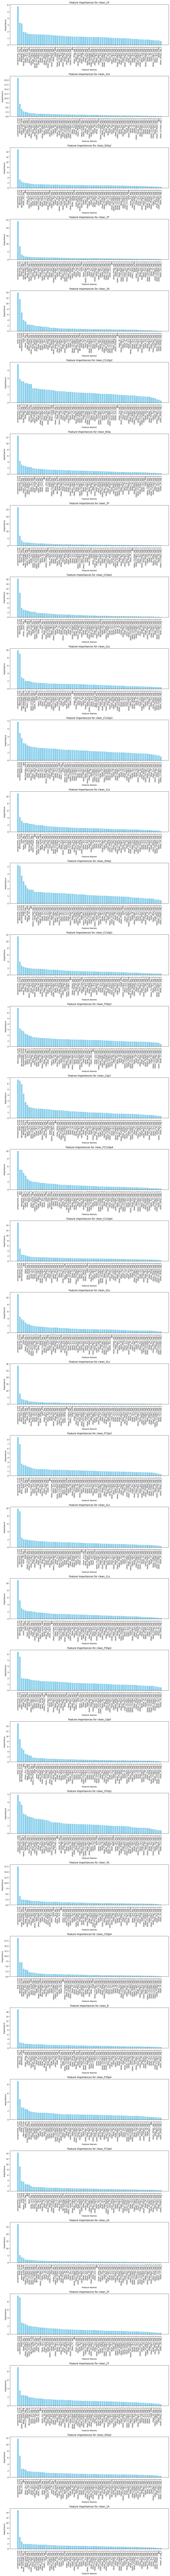

In [83]:


def plot_feature_importances(model, feature_cols, target_names):
    n_outputs = len(model.estimators_)

    # Создаём фигуру с количеством строк, равным количеству таргетов, и одной колонкой
    plt.figure(figsize=(12, n_outputs * 5))  # Увеличиваем размер фигуры для каждого таргета

    for i, estimator in enumerate(model.estimators_):
        ax = plt.subplot(n_outputs, 1, i + 1)  # Размещаем каждый график в отдельной строке
        importances = estimator.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Визуализация столбцов с важностью признаков
        plt.bar(np.array(feature_cols)[indices], np.array(importances)[indices], color='skyblue', align='center')
        plt.title(f'Feature Importances for {target_names[i]}')
        plt.xticks(rotation=90)
        plt.xlabel('Feature Names')
        plt.ylabel('Importance')

    plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
    plt.show()

# Пример вызова функции с реальными названиями таргетов
target_names = logs_.target_cols  # Используем названия таргетов из вашего кода
plot_feature_importances(model, feature_cols, target_names)

Исходя из графиков оценки важности признаков,  можно сказать что такие фичи как components_score и elements_score вносят наибольший вклад в модель

#Выводы и рекоммендации

Я использовала модель MultiOutputClassifier с базовым классификатором CatBoostClassifier. Эта модель была выбрана по нескольким причинам:

Градиентный бустинг: CatBoost является одним из наиболее эффективных алгоритмов градиентного бустинга, хорошо справляющимся с различными типами данных, включая категориальные.
Работа с несколькими целевыми переменными: MultiOutputClassifier позволяет обучать модель, которая предсказывает несколько целевых переменных одновременно, что было необходимо в данном проекте.
Устойчивость к переобучению: CatBoost включает встроенные методы регуляризации, которые помогают избежать переобучения, что делает его подходящим для сложных задач с большим количеством признаков.
Оценка качества

Качество модели я оценивала с помощью следующих метрик:

ROC AUC Score (Receiver Operating Characteristic Area Under Curve): Эта метрика измеряет площадь под кривой ROC, которая строится на основе отношения истинных положительных и ложных положительных значений. ROC AUC Score был выбран потому, что он дает хорошее представление о качестве бинарного классификатора на разных порогах отсечения.
F1 Score: Гармоническое среднее между точностью (precision) и полнотой (recall). F1 Score был выбран, потому что он учитывает как точность, так и полноту, что важно в случаях с несбалансированными данными.


Инструкция по запуску (применению)

Предобработка данных:

Я подготовила данные, разделив их на тренировочный, валидационный и тестовый наборы данных. Затем выполнила масштабирование признаков с помощью StandardScaler и применяла PCA для снижения размерности и уменьшения шума в данных.

Обучение модели:

Я инициализировала модель MultiOutputClassifier с базовым классификатором CatBoostClassifier, настроив гиперпараметры (количество итераций, глубина деревьев, скорость обучения и другие).
Модель была обучена на тренировочных данных, используя метод градиентного бустинга, чтобы оптимизировать качество предсказаний.

Оценка модели:

Я получила предсказания для валидационного и тестового наборов данных.
Метрики качества (ROC AUC Score и F1 Score) были вычислены для оценки производительности модели на разных наборах данных.



**Целью данной работы** было создание модели, способной находить элементы, которые могут быть успешно исполнены спортсменом на соревнованиях. Для достижения этой цели я выполнила следующие шаги:

**Предобработка данных:**

Данные были тщательно очищены и нормализованы. Были устранены выбросы, обработаны пропущенные значения, и добавлены лаговые признаки, что улучшило качество входных данных.
Категориальные признаки были закодированы с помощью One-Hot Encoding, а числовые признаки нормализованы с использованием StandardScaler.
**Агрегация и анализ данных:**

Проведена агрегация данных для каждого спортсмена и соревнования, включая вычисление таких метрик, как средние значения оценок, ранги и процент успешных элементов.
Введены новые признаки, такие как лаговые значения для улучшения временных зависимостей в данных.
Обучение модели:

**Была выбрана модель MultiOutputClassifier**
с базовым классификатором CatBoostClassifier, которая показала высокую эффективность при работе с многомерными целевыми переменными.
Модель была обучена на тренировочном наборе данных с использованием оптимальных гиперпараметров, таких как количество итераций, глубина деревьев и скорость обучения.
Оценка качества модели:

**Качество модели**  оценивалось с использованием метрик ROC AUC Score и F1 Score, которые показали неплохие результаты на валидационном и тестовом наборах данных.


На основе результатов, полученных в процессе валидации и тестирования модели, могу сделать несколько наблюдений. Валидационный ROC AUC Score составил 0.884. Тестовый ROC AUC немного ниже — 0.872, что может указывать на некоторые особенности тестовых данных, которые не были полностью представлены при обучении, или на начало переобучения.

Что касается F1 Score, который важен для оценки баланса между точностью и полнотой, то результаты также довольно хорошие. На валидации я получила 0.641, что является достойным показателем, учитывая сложность и неоднородность данных. На тесте F1 Score составил 0.611, показывая небольшое снижение, что может быть связано с переобучением.

Эти результаты помогают мне понять, что модель достаточно хорошо справляется с задачей, но всё ещё есть место для улучшений, особенно в устойчивости к изменениям в данных. Это мотивирует продолжить работу над оптимизацией и тонкой настройкой параметров модели.

#Рекомендации


Для дальнейшего улучшения модели можно уделить внимание изучению особенностей тестовых данных, чтобы лучше понять, почему производительность на них ниже. Оптимизация признаков также может сыграть ключевую роль, поэтому стоит пересмотреть текущий набор данных на предмет возможности улучшить или добавить новые признаки. Тонкая настройка гиперпараметров, включая скорость обучения и глубину модели, поможет бороться с переобучением и повысить точность предсказаний. Реализация стратегий, таких как кросс-валидация, может обеспечить более стабильную оценку эффективности модели. Также стоит рассмотреть возможности других моделей или ансамблевых подходов для сравнения и возможного улучшения результатов.